# Mənzil qiymətlərinin proqnozlaşdırılması

***Layihənin məqsədi:*** Verilən dəyişənlərə görə Nərimanov rayonunda yeni tikili mənzillərin qiymətlərinin proqnozlaşdırılması

### 1) Scrape olunan datasetin və library-lərin yüklənməsi

### Sütunlar
*   ***ad_id:*** bina.az tərəfindən elan üçün verilən unique id
*   ***ad_cat:*** elanın növü(verilən task-da yalnız yeni tikili elanlar öz əksini tapır
*   ***ad_floor:*** mənzilin neçənci mərtəbədə yerləşdiyini bildirən dəyişəndir
*   ***ad_square:*** Mənzilin neçə kvadrat metr sahəyə malik olduğunu bildirir.
*   ***ad_room:*** Mənzilin neçə otaqlı olduğunu bildirir
*   ***ad_price:*** Mənzilin qiymətini bildirir
*   ***ad_doc:*** Mənzilin kupçalı olub-olmadığını bildirir
*   ***ad_mortgage:*** Mənzilin ipotekaya yararlı olub-olmadığını bildirir
*   ***ad_repair:*** Mənzilin təmirli olub-olmadığını bildirir
*   ***ad_address:*** Mənzilin yerləşmə yerini bildirir və bu sütunda scrape-dən sonra excel vasitəsilə müəyyən ilkin cleaning işləri aparılmışdır
*   ***ad_viewcount:*** Mənzilin bina.az-da scrape tarixində cari baxış sayını göstərir
*   ***ad_time:*** Elanın bina.az-da yenilənmə(əlavə olunma) tarixini göstərir

In [1]:
#Warning ignore
import warnings
warnings.filterwarnings("ignore")

#importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Scikit-learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, Lars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer


#Statistics
import statsmodels.stats.api as sms
from scipy.stats import shapiro
import scipy.stats as stats
import pylab
#!pip install lightgbm
from lightgbm import LGBMRegressor
#!pip install catboost
from catboost import CatBoostRegressor
#!pip install missingno
import missingno as msno
#!pip install category_encoders
import category_encoders as ce


pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [2]:
#importing dataset
data = pd.read_excel('scrape_data.xlsx',sheet_name = 'Sheet1')
df = data.copy()

In [3]:
df

,Unnamed: 0,ad_id,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,0,3377185,Yeni tikili,7 / 17,107.3 m²,2,185 000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",Baxışların sayı: 254,Yeniləndi: 04 Aprel 2023
1,1,3399468,Yeni tikili,12 / 16,60 m²,1,110 000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",Baxışların sayı: 244,Yeniləndi: 06 Aprel 2023
2,2,3401198,Yeni tikili,6 / 16,80 m²,2,250 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",Baxışların sayı: 81,Yeniləndi: 07 Aprel 2023
3,3,3388829,Yeni tikili,4 / 8,180 m²,5,595 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",Baxışların sayı: 148,Yeniləndi: 02 Aprel 2023
4,4,3385068,Yeni tikili,14 / 16,79 m²,2,195 000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2992,3380940,Yeni tikili,11 / 22,123 m²,3,278 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi",Baxışların sayı: 75,Yeniləndi: 10 Aprel 2023
2993,2993,3377338,Yeni tikili,18 / 18,157 m²,3,205 000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 151,Yeniləndi: 29 Mart 2023
2994,2994,3333172,Yeni tikili,4 / 16,115 m²,2,229 000,AZN,var,var,yoxdur,"Ünvan: Bakı şəhəri, Xan Şuşinski küçəsi",Baxışların sayı: 112,Yeniləndi: 11 Aprel 2023
2995,2995,3392376,Yeni tikili,12 / 17,130 m²,4,299 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Ağa Nemətulla küçəsi",Baxışların sayı: 139,Yeniləndi: 04 Aprel 2023


In [4]:
#datasetin ilk 5 sütununa baxaq
df.head()

,Unnamed: 0,ad_id,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,0,3377185,Yeni tikili,7 / 17,107.3 m²,2,185 000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",Baxışların sayı: 254,Yeniləndi: 04 Aprel 2023
1,1,3399468,Yeni tikili,12 / 16,60 m²,1,110 000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",Baxışların sayı: 244,Yeniləndi: 06 Aprel 2023
2,2,3401198,Yeni tikili,6 / 16,80 m²,2,250 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",Baxışların sayı: 81,Yeniləndi: 07 Aprel 2023
3,3,3388829,Yeni tikili,4 / 8,180 m²,5,595 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",Baxışların sayı: 148,Yeniləndi: 02 Aprel 2023
4,4,3385068,Yeni tikili,14 / 16,79 m²,2,195 000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 789,Yeniləndi: 04 Aprel 2023


### 2)Sütunlar üzrə təmizləmə və type conversion işləmləri

>1. Birinci alt bölmədə ilkin data təmizləmə(lazımsız sütunların (silinməsi/sütunlardakı məlumatların uyğun formata gətirilməsi) işləri həyata keçirilib
>2. İkinci alt bölmədə null value problemləri və onların həlli nəzərdən keçirilib

#### 2.1)  ilkin data təmizləmə işləri


In [5]:
#ilk iki sütun Unnamed: 0 və ad_id heç bir mahiyyət kəsb etmədiyindən bu iki sütunu silək
cols_to_drop = ['Unnamed: 0', 'ad_id']
df = df.drop(columns=cols_to_drop)
df

,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,Yeni tikili,7 / 17,107.3 m²,2,185 000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",Baxışların sayı: 254,Yeniləndi: 04 Aprel 2023
1,Yeni tikili,12 / 16,60 m²,1,110 000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",Baxışların sayı: 244,Yeniləndi: 06 Aprel 2023
2,Yeni tikili,6 / 16,80 m²,2,250 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",Baxışların sayı: 81,Yeniləndi: 07 Aprel 2023
3,Yeni tikili,4 / 8,180 m²,5,595 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",Baxışların sayı: 148,Yeniləndi: 02 Aprel 2023
4,Yeni tikili,14 / 16,79 m²,2,195 000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123 m²,3,278 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi",Baxışların sayı: 75,Yeniləndi: 10 Aprel 2023
2993,Yeni tikili,18 / 18,157 m²,3,205 000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 151,Yeniləndi: 29 Mart 2023
2994,Yeni tikili,4 / 16,115 m²,2,229 000,AZN,var,var,yoxdur,"Ünvan: Bakı şəhəri, Xan Şuşinski küçəsi",Baxışların sayı: 112,Yeniləndi: 11 Aprel 2023
2995,Yeni tikili,12 / 17,130 m²,4,299 000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Ağa Nemətulla küçəsi",Baxışların sayı: 139,Yeniləndi: 04 Aprel 2023


In [6]:
#datasetin shape-nə baxaq.
#Deməli datasetimizdə 12 sütun(feature) və 2997 row(observation unit) mövcuddur
df.shape

(2997, 12)

In [7]:
#dataset və onun sütunları haqqında ümumiləşmiş məlumata baxaq
df.info()
#Deməli iki sütun ad_mortgage və ad_repair sütunları null value dəyərlərinə malikdir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ad_cat             2997 non-null   object
 1   add_floor          2997 non-null   object
 2   ad_square          2997 non-null   object
 3   ad_room            2997 non-null   int64 
 4   ad_price           2997 non-null   object
 5   ad_price_currency  2997 non-null   object
 6   ad_doc             2997 non-null   object
 7   ad_mortgage        958 non-null    object
 8   ad_repair          2814 non-null   object
 9   ad_address         2997 non-null   object
 10  view_count         2997 non-null   object
 11  ad_time            2997 non-null   object
dtypes: int64(1), object(11)
memory usage: 281.1+ KB


In [8]:
#Yuxarıda da göründüyü kimi ad_price sütunu ədədi sütun olduğu halda, obyekt olaraq tanınır. İlk öncə bu problemi fix-ləyək
#Bunun üçün birinci price-larda olan aradakı boşluq silinməli sonra isə type conversion edilməlidir
df['ad_price'] = df['ad_price'].str.replace(' ', '')
df['ad_price'] = df['ad_price'].astype(float)
df

,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,Yeni tikili,7 / 17,107.3 m²,2,185000.000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",Baxışların sayı: 254,Yeniləndi: 04 Aprel 2023
1,Yeni tikili,12 / 16,60 m²,1,110000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",Baxışların sayı: 244,Yeniləndi: 06 Aprel 2023
2,Yeni tikili,6 / 16,80 m²,2,250000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",Baxışların sayı: 81,Yeniləndi: 07 Aprel 2023
3,Yeni tikili,4 / 8,180 m²,5,595000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",Baxışların sayı: 148,Yeniləndi: 02 Aprel 2023
4,Yeni tikili,14 / 16,79 m²,2,195000.000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123 m²,3,278000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi",Baxışların sayı: 75,Yeniləndi: 10 Aprel 2023
2993,Yeni tikili,18 / 18,157 m²,3,205000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 151,Yeniləndi: 29 Mart 2023
2994,Yeni tikili,4 / 16,115 m²,2,229000.000,AZN,var,var,yoxdur,"Ünvan: Bakı şəhəri, Xan Şuşinski küçəsi",Baxışların sayı: 112,Yeniləndi: 11 Aprel 2023
2995,Yeni tikili,12 / 17,130 m²,4,299000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Ağa Nemətulla küçəsi",Baxışların sayı: 139,Yeniləndi: 04 Aprel 2023


In [9]:
#Eyni problem ad_square sütununda da mövcuddur. Ədədi sütuna çevrilmə üçün ilk öncə bu sütundan boşluqlar və m2 silinməli, 
#sonra isə type conversion edilməlidir
df['ad_square'] = df['ad_square'].str.replace(' ', '')
df['ad_square'] = df['ad_square'].str.replace('m²', '')
df['ad_square'] = df['ad_square'].astype(float)
df

,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,Yeni tikili,7 / 17,107.300,2,185000.000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",Baxışların sayı: 254,Yeniləndi: 04 Aprel 2023
1,Yeni tikili,12 / 16,60.000,1,110000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",Baxışların sayı: 244,Yeniləndi: 06 Aprel 2023
2,Yeni tikili,6 / 16,80.000,2,250000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",Baxışların sayı: 81,Yeniləndi: 07 Aprel 2023
3,Yeni tikili,4 / 8,180.000,5,595000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",Baxışların sayı: 148,Yeniləndi: 02 Aprel 2023
4,Yeni tikili,14 / 16,79.000,2,195000.000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123.000,3,278000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi",Baxışların sayı: 75,Yeniləndi: 10 Aprel 2023
2993,Yeni tikili,18 / 18,157.000,3,205000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",Baxışların sayı: 151,Yeniləndi: 29 Mart 2023
2994,Yeni tikili,4 / 16,115.000,2,229000.000,AZN,var,var,yoxdur,"Ünvan: Bakı şəhəri, Xan Şuşinski küçəsi",Baxışların sayı: 112,Yeniləndi: 11 Aprel 2023
2995,Yeni tikili,12 / 17,130.000,4,299000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Ağa Nemətulla küçəsi",Baxışların sayı: 139,Yeniləndi: 04 Aprel 2023


In [10]:
#İndi isə baxış sayı(view_count) sütunu üçün eyni qaydada xanada yalnız ədədi məlumatları saxlayaq
df['view_count'] = df['view_count'].str.replace('Baxışların sayı: ', '')
df['view_count'] = df['view_count'].astype(int)
df

,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,Yeni tikili,7 / 17,107.300,2,185000.000,AZN,var,NaN,yoxdur,"Ünvan: Bakı şəhəri, Yusif Vəzir Çəmənzəminli k...",254,Yeniləndi: 04 Aprel 2023
1,Yeni tikili,12 / 16,60.000,1,110000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Təbriz küçəsi",244,Yeniləndi: 06 Aprel 2023
2,Yeni tikili,6 / 16,80.000,2,250000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Həsənoğlu küç.",81,Yeniləndi: 07 Aprel 2023
3,Yeni tikili,4 / 8,180.000,5,595000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, K.Kazımzadə küçəsi",148,Yeniləndi: 02 Aprel 2023
4,Yeni tikili,14 / 16,79.000,2,195000.000,AZN,var,var,var,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123.000,3,278000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Səməd Vurğun küçəsi",75,Yeniləndi: 10 Aprel 2023
2993,Yeni tikili,18 / 18,157.000,3,205000.000,AZN,yoxdur,NaN,yoxdur,"Ünvan: Bakı şəhəri, Faiq Yusifov küçəsi",151,Yeniləndi: 29 Mart 2023
2994,Yeni tikili,4 / 16,115.000,2,229000.000,AZN,var,var,yoxdur,"Ünvan: Bakı şəhəri, Xan Şuşinski küçəsi",112,Yeniləndi: 11 Aprel 2023
2995,Yeni tikili,12 / 17,130.000,4,299000.000,AZN,var,NaN,var,"Ünvan: Bakı şəhəri, Ağa Nemətulla küçəsi",139,Yeniləndi: 04 Aprel 2023


In [11]:
#ad_address sütunundan "Ünvan: Bakı şəhəri, " hissələrini çıxaraq
df['ad_address'] = df['ad_address'].str.replace('Ünvan: Bakı şəhəri,', '')
df

,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time
0,Yeni tikili,7 / 17,107.300,2,185000.000,AZN,var,NaN,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,Yeniləndi: 04 Aprel 2023
1,Yeni tikili,12 / 16,60.000,1,110000.000,AZN,yoxdur,NaN,yoxdur,Təbriz küçəsi,244,Yeniləndi: 06 Aprel 2023
2,Yeni tikili,6 / 16,80.000,2,250000.000,AZN,var,NaN,var,Həsənoğlu küç.,81,Yeniləndi: 07 Aprel 2023
3,Yeni tikili,4 / 8,180.000,5,595000.000,AZN,var,NaN,var,K.Kazımzadə küçəsi,148,Yeniləndi: 02 Aprel 2023
4,Yeni tikili,14 / 16,79.000,2,195000.000,AZN,var,var,var,Faiq Yusifov küçəsi,789,Yeniləndi: 04 Aprel 2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123.000,3,278000.000,AZN,var,NaN,var,Səməd Vurğun küçəsi,75,Yeniləndi: 10 Aprel 2023
2993,Yeni tikili,18 / 18,157.000,3,205000.000,AZN,yoxdur,NaN,yoxdur,Faiq Yusifov küçəsi,151,Yeniləndi: 29 Mart 2023
2994,Yeni tikili,4 / 16,115.000,2,229000.000,AZN,var,var,yoxdur,Xan Şuşinski küçəsi,112,Yeniləndi: 11 Aprel 2023
2995,Yeni tikili,12 / 17,130.000,4,299000.000,AZN,var,NaN,var,Ağa Nemətulla küçəsi,139,Yeniləndi: 04 Aprel 2023


In [12]:
#ad_floor sütununu iki sütuna çevirək(neçənci mərtəbə yerləşir və neçə mərtəbəli binanın) və type conversion aparaq
df[['aparment_floor', 'building_total_floor']] = df['add_floor'].str.split('/', expand=True)

cols_to_update = ['aparment_floor', 'building_total_floor']
for col in cols_to_update:
    df[col] = df[col].str.replace(' ', '')
    df[col] = df[col].astype(int)
df


,ad_cat,add_floor,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time,aparment_floor,building_total_floor
0,Yeni tikili,7 / 17,107.300,2,185000.000,AZN,var,NaN,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,Yeniləndi: 04 Aprel 2023,7,17
1,Yeni tikili,12 / 16,60.000,1,110000.000,AZN,yoxdur,NaN,yoxdur,Təbriz küçəsi,244,Yeniləndi: 06 Aprel 2023,12,16
2,Yeni tikili,6 / 16,80.000,2,250000.000,AZN,var,NaN,var,Həsənoğlu küç.,81,Yeniləndi: 07 Aprel 2023,6,16
3,Yeni tikili,4 / 8,180.000,5,595000.000,AZN,var,NaN,var,K.Kazımzadə küçəsi,148,Yeniləndi: 02 Aprel 2023,4,8
4,Yeni tikili,14 / 16,79.000,2,195000.000,AZN,var,var,var,Faiq Yusifov küçəsi,789,Yeniləndi: 04 Aprel 2023,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,11 / 22,123.000,3,278000.000,AZN,var,NaN,var,Səməd Vurğun küçəsi,75,Yeniləndi: 10 Aprel 2023,11,22
2993,Yeni tikili,18 / 18,157.000,3,205000.000,AZN,yoxdur,NaN,yoxdur,Faiq Yusifov küçəsi,151,Yeniləndi: 29 Mart 2023,18,18
2994,Yeni tikili,4 / 16,115.000,2,229000.000,AZN,var,var,yoxdur,Xan Şuşinski küçəsi,112,Yeniləndi: 11 Aprel 2023,4,16
2995,Yeni tikili,12 / 17,130.000,4,299000.000,AZN,var,NaN,var,Ağa Nemətulla küçəsi,139,Yeniləndi: 04 Aprel 2023,12,17


In [13]:
#Müvafiq məlumatlar yeni sütunlara köçürüldüyü üçün əvvəlki sütunu silək
df = df.drop('add_floor', axis=1)
df

,ad_cat,ad_square,ad_room,ad_price,ad_price_currency,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,ad_time,aparment_floor,building_total_floor
0,Yeni tikili,107.300,2,185000.000,AZN,var,NaN,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,Yeniləndi: 04 Aprel 2023,7,17
1,Yeni tikili,60.000,1,110000.000,AZN,yoxdur,NaN,yoxdur,Təbriz küçəsi,244,Yeniləndi: 06 Aprel 2023,12,16
2,Yeni tikili,80.000,2,250000.000,AZN,var,NaN,var,Həsənoğlu küç.,81,Yeniləndi: 07 Aprel 2023,6,16
3,Yeni tikili,180.000,5,595000.000,AZN,var,NaN,var,K.Kazımzadə küçəsi,148,Yeniləndi: 02 Aprel 2023,4,8
4,Yeni tikili,79.000,2,195000.000,AZN,var,var,var,Faiq Yusifov küçəsi,789,Yeniləndi: 04 Aprel 2023,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Yeni tikili,123.000,3,278000.000,AZN,var,NaN,var,Səməd Vurğun küçəsi,75,Yeniləndi: 10 Aprel 2023,11,22
2993,Yeni tikili,157.000,3,205000.000,AZN,yoxdur,NaN,yoxdur,Faiq Yusifov küçəsi,151,Yeniləndi: 29 Mart 2023,18,18
2994,Yeni tikili,115.000,2,229000.000,AZN,var,var,yoxdur,Xan Şuşinski küçəsi,112,Yeniləndi: 11 Aprel 2023,4,16
2995,Yeni tikili,130.000,4,299000.000,AZN,var,NaN,var,Ağa Nemətulla küçəsi,139,Yeniləndi: 04 Aprel 2023,12,17


In [14]:
#Yenidən dataframe-ə nəzər yetirək
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_cat                2997 non-null   object 
 1   ad_square             2997 non-null   float64
 2   ad_room               2997 non-null   int64  
 3   ad_price              2997 non-null   float64
 4   ad_price_currency     2997 non-null   object 
 5   ad_doc                2997 non-null   object 
 6   ad_mortgage           958 non-null    object 
 7   ad_repair             2814 non-null   object 
 8   ad_address            2997 non-null   object 
 9   view_count            2997 non-null   int32  
 10  ad_time               2997 non-null   object 
 11  aparment_floor        2997 non-null   int32  
 12  building_total_floor  2997 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(7)
memory usage: 269.4+ KB


In [15]:
#Sütunlar üzrə categoric dəyişənlərin növlərinə diqqət yetirək
print(df.ad_cat.value_counts())
print(df.ad_price_currency.value_counts())
print(df.ad_mortgage.value_counts())
print(df.ad_repair.value_counts())
print(df.ad_address.value_counts())
print(df.ad_time.value_counts())

Yeni tikili    2997
Name: ad_cat, dtype: int64
AZN    2997
Name: ad_price_currency, dtype: int64
var    958
Name: ad_mortgage, dtype: int64
var       2053
yoxdur     761
Name: ad_repair, dtype: int64
 Təbriz küçəsi               561
 Əliyar Əliyev küçəsi        283
 Qarabağ küçəsi              259
 Faiq Yusifov küçəsi         118
 Nazim Hacıyev küç           103
                            ... 
 Hüseyn Cavid pr. 777          1
 Hənifə Ələsgərova küçəsi      1
 Ələsgər Hüseynov k.           1
 Yanvar Nəsirov küçəsi         1
 Ənvər Qasımzadə küç.          1
Name: ad_address, Length: 110, dtype: int64
Yeniləndi: 13 Aprel 2023    299
Yeniləndi: 11 Aprel 2023    244
Yeniləndi: 12 Aprel 2023    211
Yeniləndi: 10 Aprel 2023    168
Yeniləndi: 08 Aprel 2023    164
                           ... 
Yeniləndi: Dünən 23:13        1
Yeniləndi: Dünən 10:54        1
Yeniləndi: Dünən 16:40        1
Yeniləndi: Bugün 12:18        1
Yeniləndi: Dünən 12:09        1
Name: ad_time, Length: 402, dtype: int64


In [16]:
'''
Göründüyü kimi bütün elanlar yeni tikili kateqoriyasında və AZN-lə verilmişdir. Buna görə də bu sütunlarda fərq olmadığı üçün
#bu sütunların silinməsi heç bir fərq yaratmayacaq.(Əgər dataset daha geniş kateqoriyalara genişləndirilərsə, 
bu sütun saxlana bilərdi) Bundan başqa ad_time sütunu da qiymətlərin predict olunmasında mahiyyət kəsb eləmir. Analizin məqsədi 
time series analiz olmadığı üçün bu sütunu da silə bilərik.
'''
cols_to_drop = ['ad_cat', 'ad_price_currency','ad_time']
df = df.drop(columns=cols_to_drop)
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,var,NaN,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,7,17
1,60.000,1,110000.000,yoxdur,NaN,yoxdur,Təbriz küçəsi,244,12,16
2,80.000,2,250000.000,var,NaN,var,Həsənoğlu küç.,81,6,16
3,180.000,5,595000.000,var,NaN,var,K.Kazımzadə küçəsi,148,4,8
4,79.000,2,195000.000,var,var,var,Faiq Yusifov küçəsi,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,var,NaN,var,Səməd Vurğun küçəsi,75,11,22
2993,157.000,3,205000.000,yoxdur,NaN,yoxdur,Faiq Yusifov küçəsi,151,18,18
2994,115.000,2,229000.000,var,var,yoxdur,Xan Şuşinski küçəsi,112,4,16
2995,130.000,4,299000.000,var,NaN,var,Ağa Nemətulla küçəsi,139,12,17


#### 2.2)  Null value problemlərinin həlli

In [17]:
#Datasetimizn son halına yenidən baxaq
df.info()
#Göründüyü kimi kimi ipotekaya yararlı olub olmama sütunu ilə təmir sütununda null valuelar mövcuddur.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_square             2997 non-null   float64
 1   ad_room               2997 non-null   int64  
 2   ad_price              2997 non-null   float64
 3   ad_doc                2997 non-null   object 
 4   ad_mortgage           958 non-null    object 
 5   ad_repair             2814 non-null   object 
 6   ad_address            2997 non-null   object 
 7   view_count            2997 non-null   int32  
 8   aparment_floor        2997 non-null   int32  
 9   building_total_floor  2997 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 199.1+ KB


In [18]:
#hər bir feature üzrə null olan dəyərlərin sayına baxaq 
df.isnull().sum()

ad_square                  0
ad_room                    0
ad_price                   0
ad_doc                     0
ad_mortgage             2039
ad_repair                183
ad_address                 0
view_count                 0
aparment_floor             0
building_total_floor       0
dtype: int64

In [19]:
#ümumilikdə null value sayı
df.isnull().sum().sum()

2222

In [20]:
#Ən az bir null value -a malik observation unitlər
df[df.isnull().any(axis=1)]

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,var,NaN,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,7,17
1,60.000,1,110000.000,yoxdur,NaN,yoxdur,Təbriz küçəsi,244,12,16
2,80.000,2,250000.000,var,NaN,var,Həsənoğlu küç.,81,6,16
3,180.000,5,595000.000,var,NaN,var,K.Kazımzadə küçəsi,148,4,8
7,133.000,4,307000.000,yoxdur,NaN,var,Təbriz küçəsi,198,7,19
...,...,...,...,...,...,...,...,...,...,...
2991,122.000,3,410000.000,var,NaN,var,Faiq Yusifov küçəsi,100,13,16
2992,123.000,3,278000.000,var,NaN,var,Səməd Vurğun küçəsi,75,11,22
2993,157.000,3,205000.000,yoxdur,NaN,yoxdur,Faiq Yusifov küçəsi,151,18,18
2995,130.000,4,299000.000,var,NaN,var,Ağa Nemətulla küçəsi,139,12,17


>> Bina.az-da elan yerləşdirilən zaman sistem özü avtomatik olaraq "ipoteka var" və "çıxarış var" bölmələrini checkbox olaraq soruşur. Buna görə də ad_mortgage sütununda olan nan-ların əslində ipotekanın olmadığı mənasına gəldiyini deyə bilərik(958 elan sahibi var kimi işarələyib.Digərləri isə işarələməyib). Təmirli və təmirsiz bölməsi isə iki seçimlidir. Optional olduğu üçün bəzi elan sahibləri buranı doldurmayıb. Beləliklə, biz ad_mortgage sütunundakı null value-ları "yoxdur" kimi fill edə, digər ad_repair(mənzil mütləq ya təmirli, ya da təmirsiz olmalıdır) sütunu üzrə isə başqa metodlardan istifadə etməliyik. 

In [21]:
#ad_mortgage sütununun "yoxdur" ilə fill edilməsi
df['ad_mortgage'] = df['ad_mortgage'].fillna('yoxdur')
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,var,yoxdur,yoxdur,Yusif Vəzir Çəmənzəminli küçəsi,254,7,17
1,60.000,1,110000.000,yoxdur,yoxdur,yoxdur,Təbriz küçəsi,244,12,16
2,80.000,2,250000.000,var,yoxdur,var,Həsənoğlu küç.,81,6,16
3,180.000,5,595000.000,var,yoxdur,var,K.Kazımzadə küçəsi,148,4,8
4,79.000,2,195000.000,var,var,var,Faiq Yusifov küçəsi,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,var,yoxdur,var,Səməd Vurğun küçəsi,75,11,22
2993,157.000,3,205000.000,yoxdur,yoxdur,yoxdur,Faiq Yusifov küçəsi,151,18,18
2994,115.000,2,229000.000,var,var,yoxdur,Xan Şuşinski küçəsi,112,4,16
2995,130.000,4,299000.000,var,yoxdur,var,Ağa Nemətulla küçəsi,139,12,17


* Missingno kitabxanası ilə null value-ları dağılmasını vizuallaşdıraq. Null value-ların datanın strukturu ilə əlaqəli olub olmadığı test etmək məqsədilə vizuallaşdırma edə bilərik

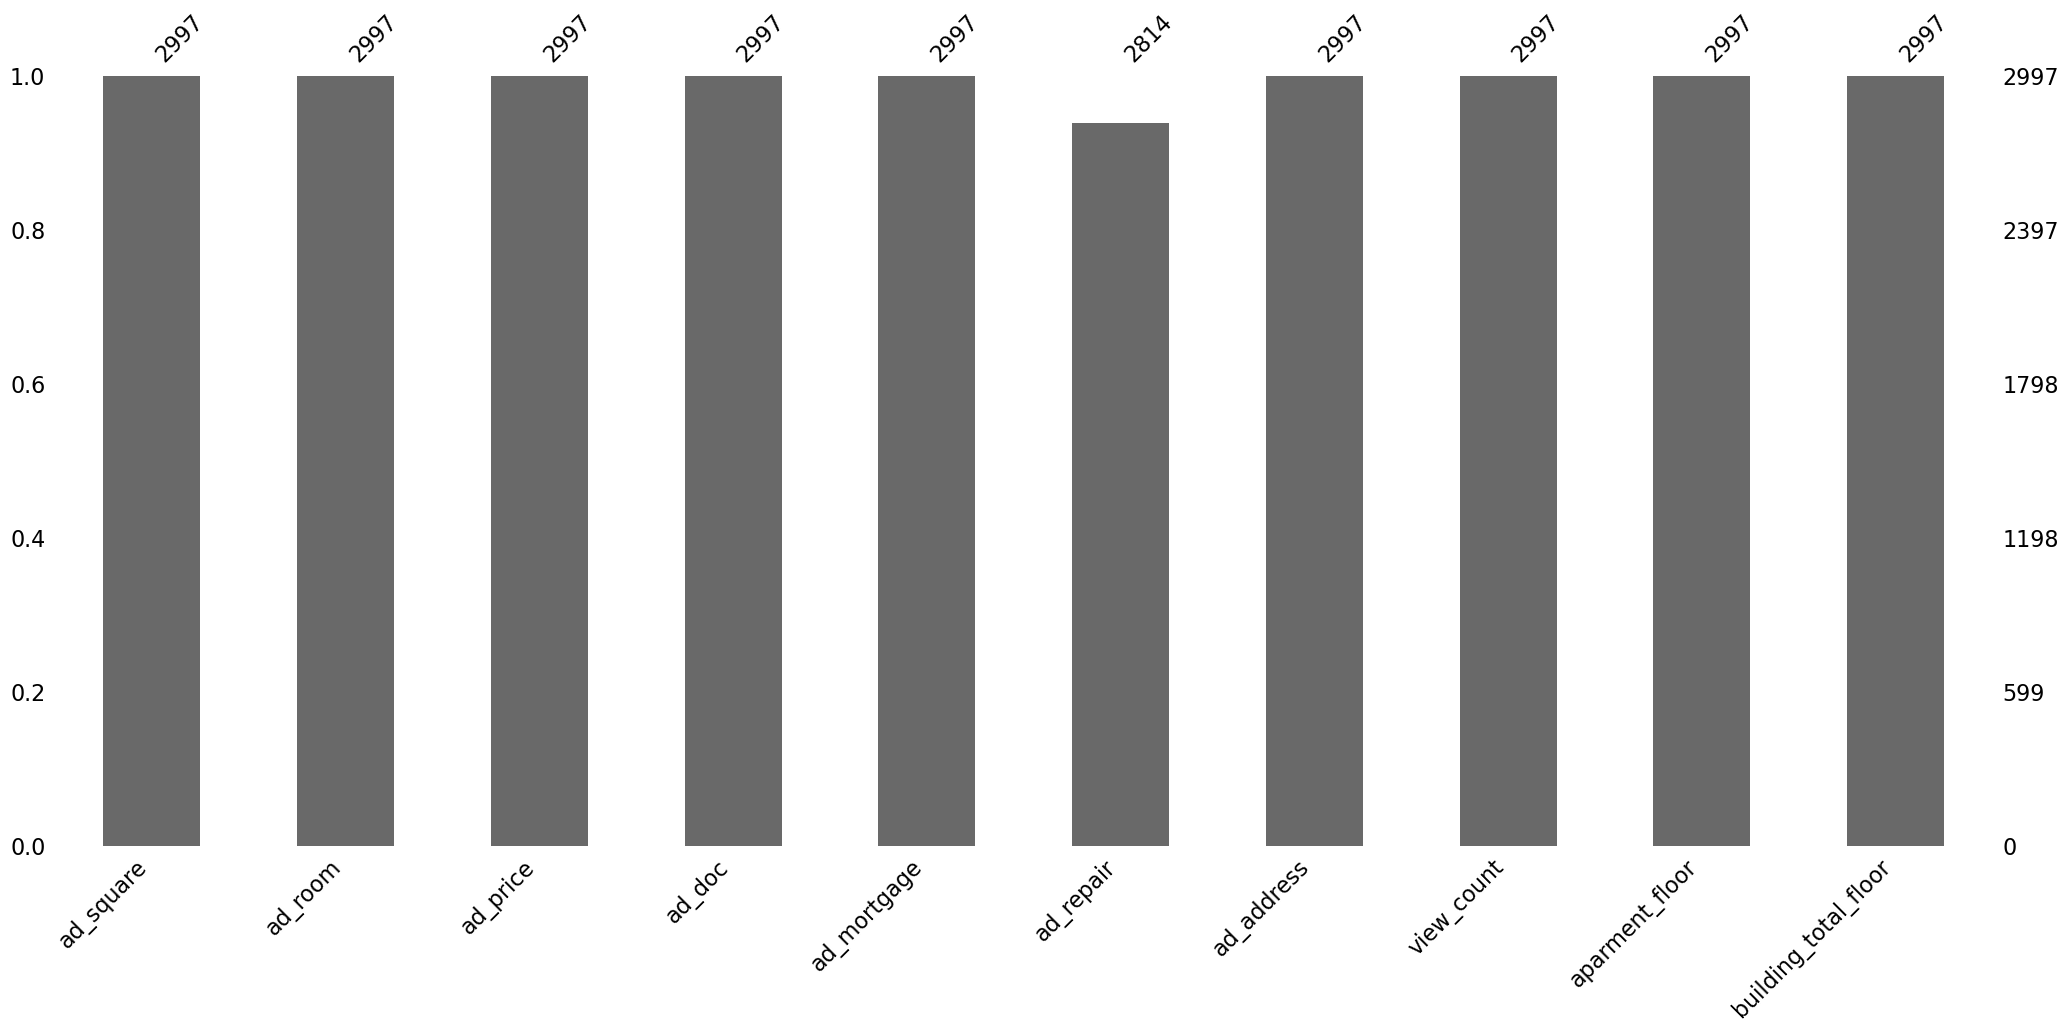

In [23]:
msno.bar(df);

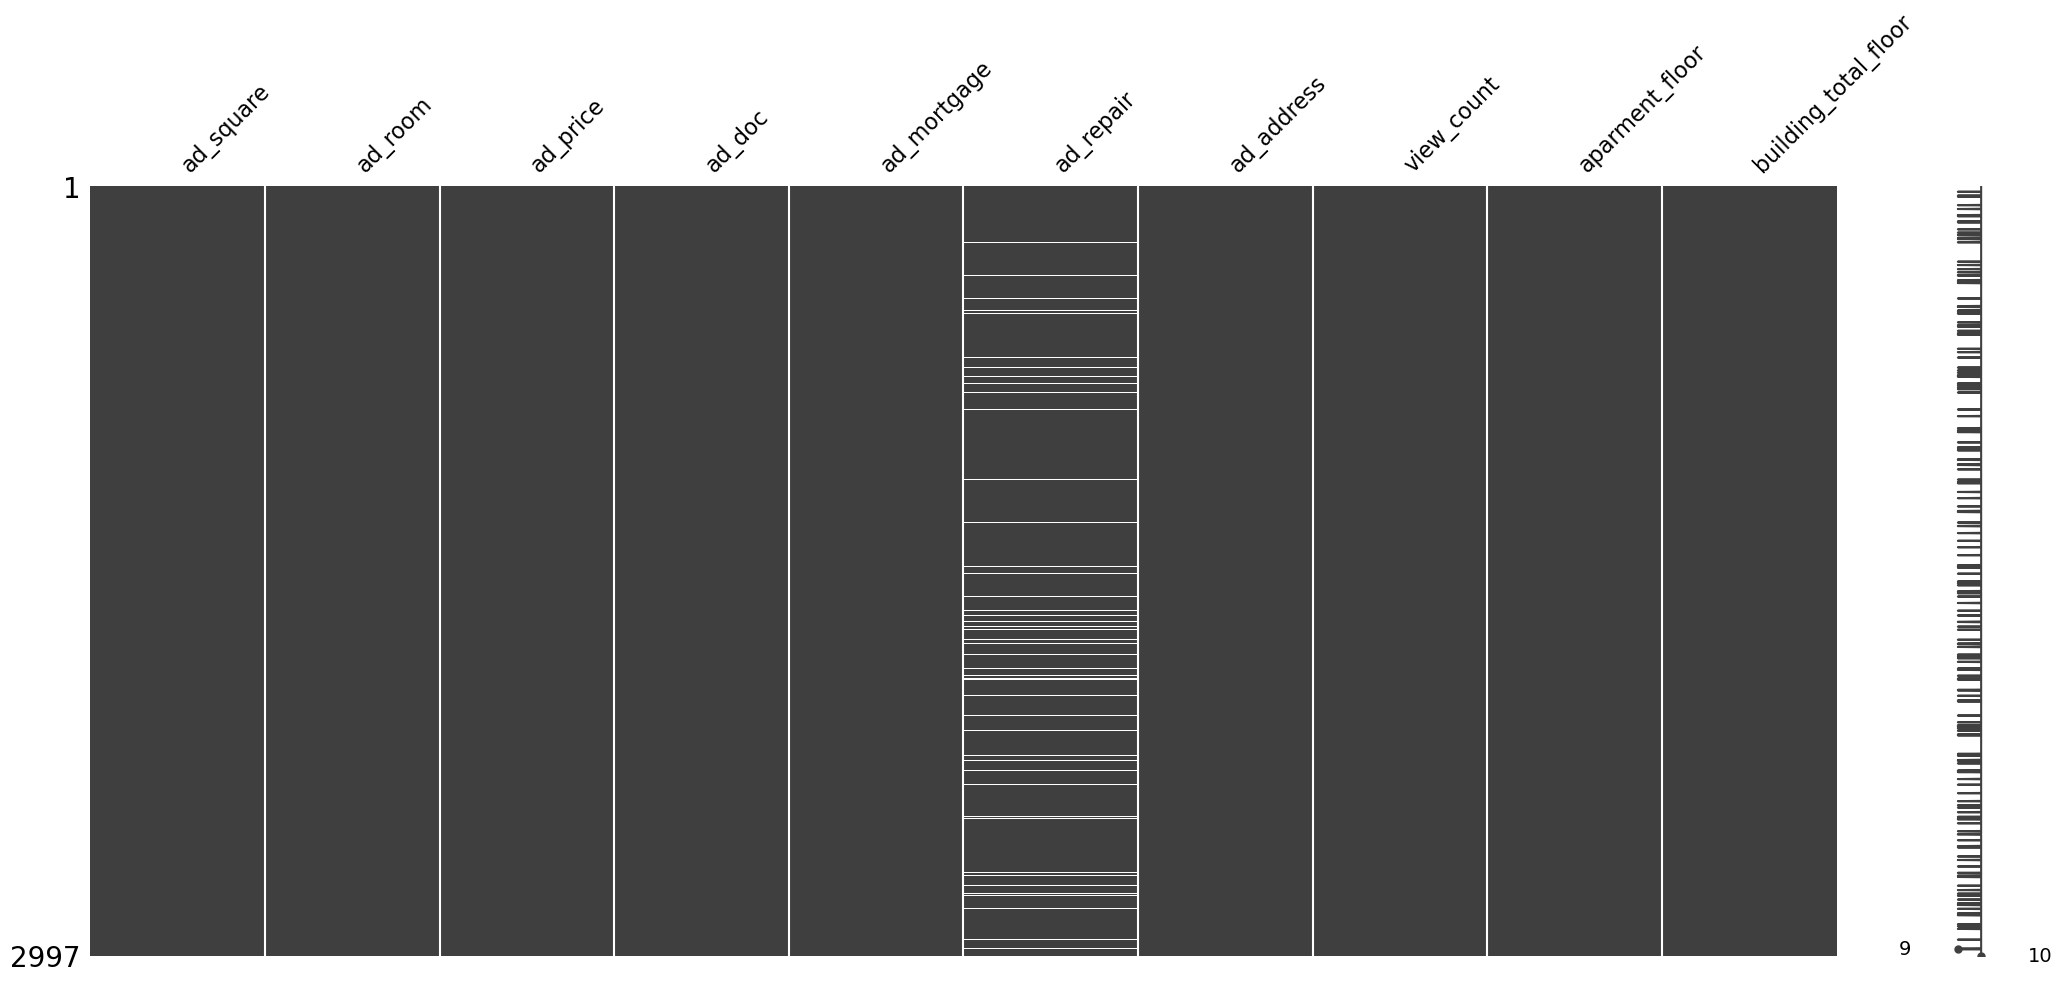

In [24]:
msno.matrix(df);

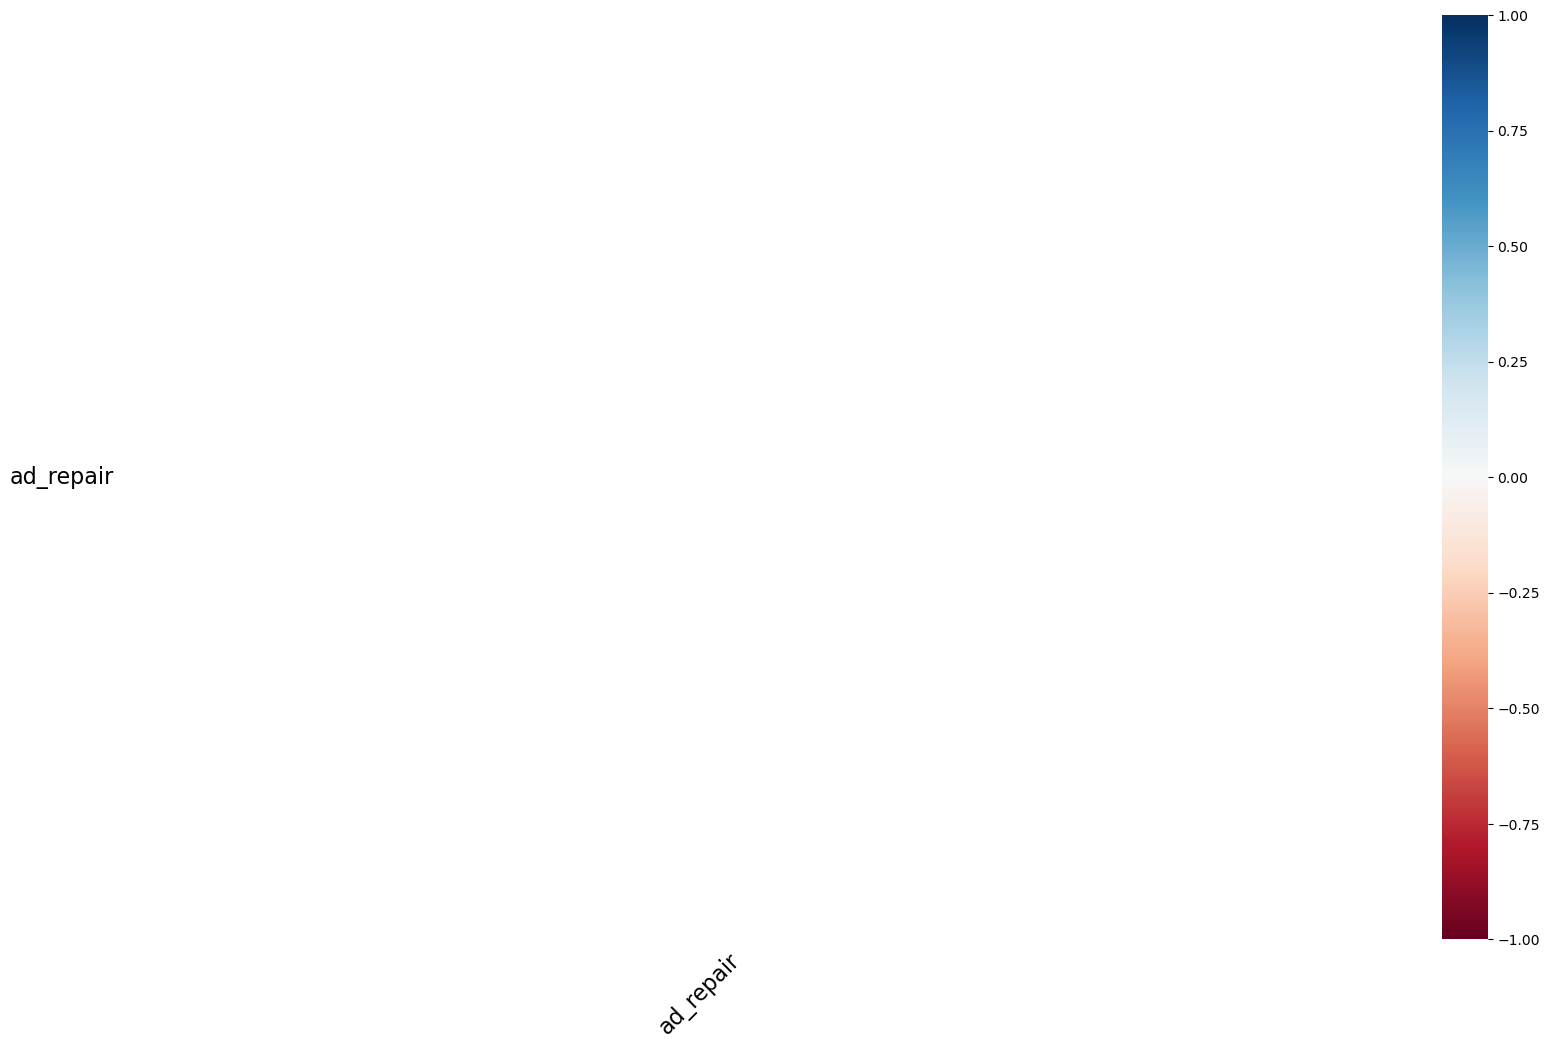

In [25]:
msno.heatmap(df);

> Nəticə: Göründüyü kimi null value-lar datanın özünün strukturu ilə əlaqəli deyil

* K-Nearest Neighbors (KNN) alqoritmi ilə kateqorik null value-ları onlara ən yaxın qonşu elementlərin parametrlərinə görə dolduraq
> 1.KNN və digər alqoritmlər null imputation alqoritmləri əsasən rəqəmsal data type-ı ilə işlədiyi üçün birinci kateqorik dəyişənləri diskretləşdirək.
>> Küçə adları daha çox kateqoriyalı dəyişən olduğu üçün onun target encoding edilməsi məqsədə uyğundur. Bu metod price dəyişəninə təsirə görə datanı encode edilməsini nəzərdə tutur.ad_doc/ad_mortgage/ad_repair dəyişənləri isə one-hot(1-0) kimi encoding edilməsi məqsədəuyğundur. 

In [26]:
# encoding edilməsi gərəkən dəyişənlərin müəyyən edilməsi
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['ad_doc', 'ad_mortgage', 'ad_repair', 'ad_address']

In [27]:
# ad_address(Küçə adlarının) encoding edilməsi
encoder = ce.TargetEncoder(cols=['ad_address'])
encoder.fit(df['ad_address'], df['ad_price'])
df['ad_address'] = encoder.transform(df['ad_address'])
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,var,yoxdur,yoxdur,296684.896,254,7,17
1,60.000,1,110000.000,yoxdur,yoxdur,yoxdur,250377.430,244,12,16
2,80.000,2,250000.000,var,yoxdur,var,301327.089,81,6,16
3,180.000,5,595000.000,var,yoxdur,var,340242.842,148,4,8
4,79.000,2,195000.000,var,var,var,287035.704,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,var,yoxdur,var,241534.643,75,11,22
2993,157.000,3,205000.000,yoxdur,yoxdur,yoxdur,287035.704,151,18,18
2994,115.000,2,229000.000,var,var,yoxdur,276133.700,112,4,16
2995,130.000,4,299000.000,var,yoxdur,var,253736.688,139,12,17


In [28]:
#ad_doc/ad_mortgage/ad_repair sütunlarının manual olaraq map funksiyası ilə encoding edilməsi
df['ad_doc']=df.ad_doc.map({'var':1,'yoxdur':0})
df['ad_mortgage']=df.ad_mortgage.map({'var':1,'yoxdur':0})
df['ad_repair']=df.ad_repair.map({'var':1,'yoxdur':0})

In [29]:
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,1,0,0.000,296684.896,254,7,17
1,60.000,1,110000.000,0,0,0.000,250377.430,244,12,16
2,80.000,2,250000.000,1,0,1.000,301327.089,81,6,16
3,180.000,5,595000.000,1,0,1.000,340242.842,148,4,8
4,79.000,2,195000.000,1,1,1.000,287035.704,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,1,0,1.000,241534.643,75,11,22
2993,157.000,3,205000.000,0,0,0.000,287035.704,151,18,18
2994,115.000,2,229000.000,1,1,0.000,276133.700,112,4,16
2995,130.000,4,299000.000,1,0,1.000,253736.688,139,12,17


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_square             2997 non-null   float64
 1   ad_room               2997 non-null   int64  
 2   ad_price              2997 non-null   float64
 3   ad_doc                2997 non-null   int64  
 4   ad_mortgage           2997 non-null   int64  
 5   ad_repair             2814 non-null   float64
 6   ad_address            2997 non-null   float64
 7   view_count            2997 non-null   int32  
 8   aparment_floor        2997 non-null   int32  
 9   building_total_floor  2997 non-null   int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 199.1 KB


> 2.Datamızı scale edək(KNN düzgün predict edə bilsin deyə) və KNN alqoritmi ilə null dəyərləri fill edək

In [31]:
scaler = MinMaxScaler()
df_repair_predict = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
imputer = KNNImputer(n_neighbors = 2)
df_repair_predict = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

In [32]:
df['ad_repair']=df_repair_predict['ad_repair']
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,1,0,0.000,296684.896,254,7,17
1,60.000,1,110000.000,0,0,0.000,250377.430,244,12,16
2,80.000,2,250000.000,1,0,1.000,301327.089,81,6,16
3,180.000,5,595000.000,1,0,1.000,340242.842,148,4,8
4,79.000,2,195000.000,1,1,1.000,287035.704,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,1,0,1.000,241534.643,75,11,22
2993,157.000,3,205000.000,0,0,0.000,287035.704,151,18,18
2994,115.000,2,229000.000,1,1,0.000,276133.700,112,4,16
2995,130.000,4,299000.000,1,0,1.000,253736.688,139,12,17


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ad_square             2997 non-null   float64
 1   ad_room               2997 non-null   int64  
 2   ad_price              2997 non-null   float64
 3   ad_doc                2997 non-null   int64  
 4   ad_mortgage           2997 non-null   int64  
 5   ad_repair             2997 non-null   float64
 6   ad_address            2997 non-null   float64
 7   view_count            2997 non-null   int32  
 8   aparment_floor        2997 non-null   int32  
 9   building_total_floor  2997 non-null   int32  
dtypes: float64(4), int32(3), int64(3)
memory usage: 199.1 KB


### 3) Təmizlənmiş datanın Statistical və Exploratory Data Analizi


#### 3.1)  Qısa statistik təhlil

In [34]:
#Deskriptiv statistik təhlil
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_square,2997.000,126.379,67.272,30.000,86.000,115.000,153.000,1050.000
ad_room,2997.000,2.916,0.966,1.000,2.000,3.000,3.000,15.000
ad_price,2997.000,273759.594,169837.084,65000.000,194000.000,250000.000,310000.000,3600000.000
ad_doc,2997.000,0.667,0.471,0.000,0.000,1.000,1.000,1.000
ad_mortgage,2997.000,0.320,0.466,0.000,0.000,0.000,1.000,1.000
ad_repair,2997.000,0.725,0.446,0.000,0.000,1.000,1.000,1.000
ad_address,2997.000,269615.782,66989.159,209213.803,248534.395,250377.430,276133.700,816283.067
view_count,2997.000,447.104,851.142,17.000,98.000,178.000,409.000,12064.000
aparment_floor,2997.000,9.091,4.443,1.000,5.000,9.000,12.000,22.000
building_total_floor,2997.000,15.931,2.891,1.000,16.000,16.000,17.000,26.000


##### Mənzil qiymətləri üçün güvən aralıqları(Confidence intervals) 

In [35]:
#95 faiz əminliklə ev qiymətləri otaq sayı nəzərə alınmaqla hansı aralıqda dəyişir
confidence_list =[]
for i in range(1,7):
    confidence_dict ={}
    a = sms.DescrStatsW(df[df['ad_room']==i]['ad_price']).tconfint_mean()[0]
    b = sms.DescrStatsW(df[df['ad_room']==i]['ad_price']).tconfint_mean()[1]
    confidence_dict['room_count'] =i
    confidence_dict['room_price_lower_bound']=a
    confidence_dict['room_price_upper_bound']=b
    confidence_list.append(confidence_dict)
confidence_df = pd.DataFrame(confidence_list, columns=['room_count', 'room_price_lower_bound', 'room_price_upper_bound'])
confidence_df

,room_count,room_price_lower_bound,room_price_upper_bound
0,1,108879.519,117872.167
1,2,182814.033,188751.067
2,3,265171.163,271979.178
3,4,360896.180,381415.452
4,5,486370.367,659643.683
5,6,582087.619,1015579.047


##### Mənzil qiymətlərinin kupça ilə əlaqəsinin T testi

H0: Kupça olan və olmayan evlərin qiymətləri arasında fərq yoxdur

H1:  Fərq var
Fərzetmələr: Normality,Homogeneity of variance,Independence. İlk öncə bu assumptionların hər biri yoxlanılmalı və ona görə 
T test yoxsa Mann-Whitney U test istifadə edilməsinə qərar verilməlidir. Verilən datalar bir-birindən asılı olmadığı üçün sonuncu Independence fərzetməsi doğrudur.

###### Normality assumptions test

In [36]:
statistic, p_value = shapiro(df[df["ad_doc"]==1]['ad_price'])
print(f"Shapiro-Wilk test statistic: {statistic:.5f}")
print(f"p-value: {p_value:.5f}")
#Göründüyü kimi data normal paylanmaya malik deyil.Çünki p-value dəyəri 0.05-dən kiçikdir. Deməli H0 normal paylanıb hipotezi
#rədd edilməlidir

Shapiro-Wilk test statistic: 0.52955
p-value: 0.00000


In [37]:
statistic, p_value = shapiro(df[df["ad_doc"]==0]['ad_price'])
print(f"Shapiro-Wilk test statistic: {statistic:.5f}")
print(f"p-value: {p_value:.5f}")
#Göründüyü kimi data normal paylanmaya malik deyil.Çünki p-value dəyəri 0.05-dən kiçikdir. Deməli H0 normal paylanıb hipotezi
#rədd edilməlidir

Shapiro-Wilk test statistic: 0.90971
p-value: 0.00000


###### Homogenity test

In [38]:
stats.levene(df[df["ad_doc"]==0]['ad_price'],df[df["ad_doc"]==1]['ad_price'])
#Göründüyü kimi verilən data homogen deyil.Çünki p-value dəyəri 0.05-dən kiçikdir. 
#Deməli H0 homogendir hipotezi rədd edilməlidir

LeveneResult(statistic=16.031455453423717, pvalue=6.381148880522706e-05)

In [39]:
#Yuxarıda 2 fərzetmə tələbi ödənmədiyi üçün Mann-Whitney U testi edilməlidir.
result = stats.mannwhitneyu(df[df["ad_doc"]==1]['ad_price'], df[df["ad_doc"]==0]['ad_price'])
print('F-statistic: {:.3f}, p-value: {:.3f}'.format(result.statistic, result.pvalue))
#Outputa baxsaq p value dəyərinin 0.05-dən kiçik olduğunu görərik. Bu bizə null hypothesisi rədd etməyə imkan verir.Demeli 95 
#faiz guvenle kupça olan və olmayan evlərin qiymətləri arasında anlamlı(statistik) bir ferq olduğu qənaətinə gəlirik.

F-statistic: 1254164.500, p-value: 0.000


##### 3.2 Datanın EDA analizi

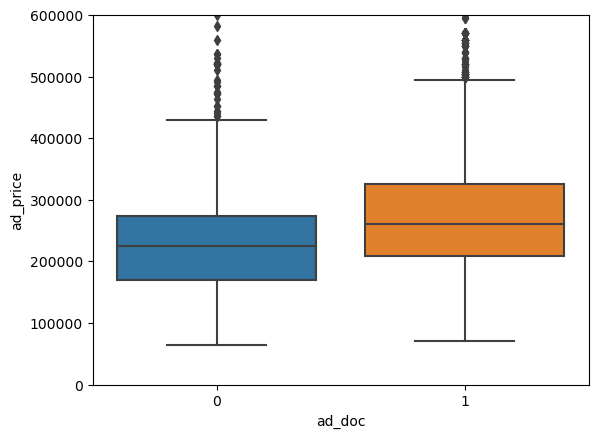

In [40]:
#Gəlin kupçalı və kupçasız mənzil qiymətləri arasındakı fərqi vizual olaraq göstərək
sns.boxplot(data = df,y = df["ad_price"],x = df["ad_doc"]);
# set y limits
plt.ylim(0, 600000)
plt.show()

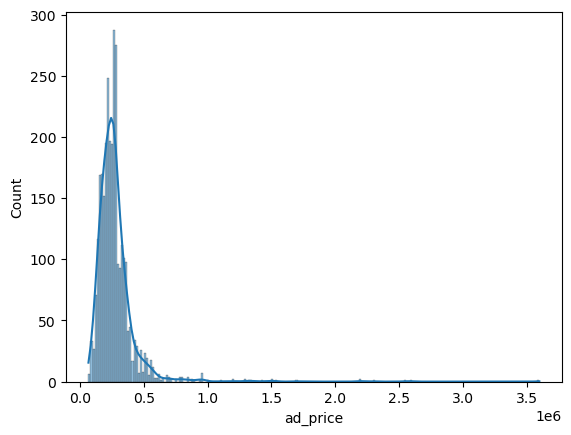

In [41]:
#Paylanmaya nəzər yetirsək görərik ki, gözlənildiyi kimi əmlak qiymətləri sola meylli paylanmaya(left-skewed) malikdir.
sns.histplot(data=df, x="ad_price", kde = True);

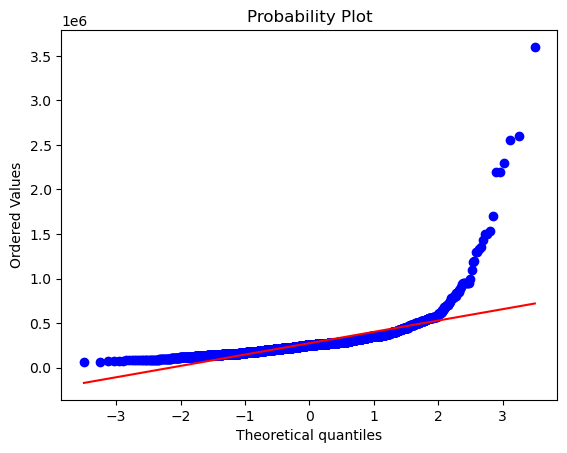

In [42]:
#Qiymətlərin normal paylanmaya yaxınlığının qqplot ilə təyini
stats.probplot(df['ad_price'], dist="norm", plot=pylab)
pylab.show()

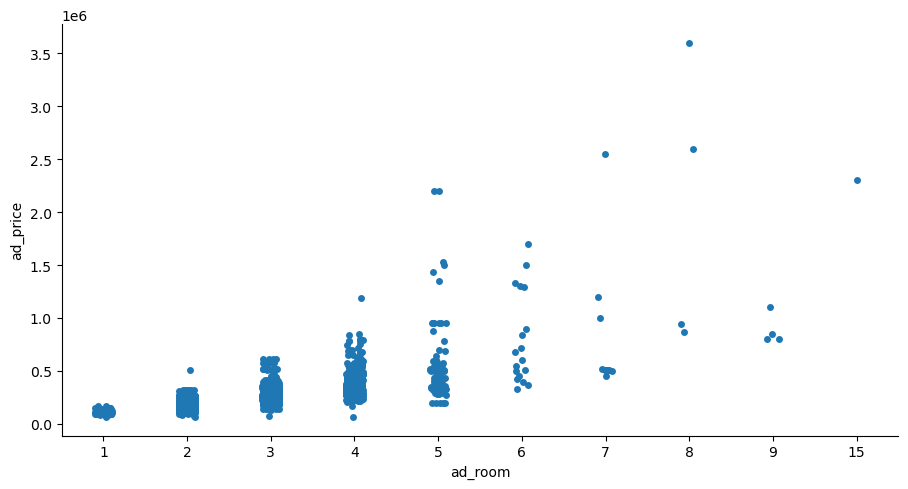

In [43]:
#Otaq sayı ilə qiymət arasında əlaqənin təhlili
fig = sns.catplot(x="ad_room", y="ad_price", jitter=True ,data=df)
fig.fig.set_size_inches(10,5);
#Göründüyü kimi Nərimanovda yeni tikili mənzil elanlarında əsasən 2/3 və 4 otaqlı mənzillər üstünlük təşkil edir.

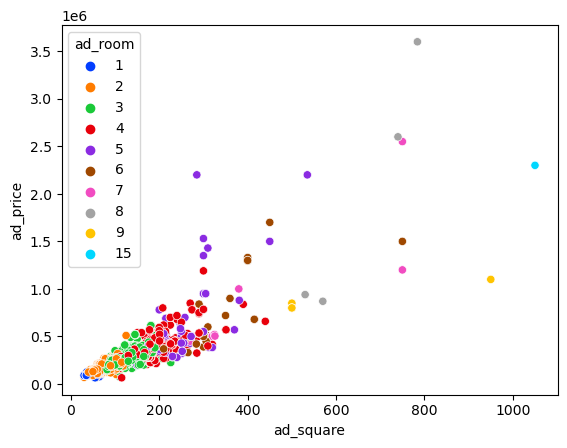

In [44]:
#Göründüyü kimi evin sahəsi və evin qiyməti arasında müsbət korrelyasiya əlaqəsi vardır.Belə müsbət əlaqə həmçinin evin otaq 
#sayı və qiyməti və sahəsi arasında da müşahidə olunur.
sns.scatterplot(x="ad_square", y="ad_price", hue='ad_room',palette ='bright',data=df);

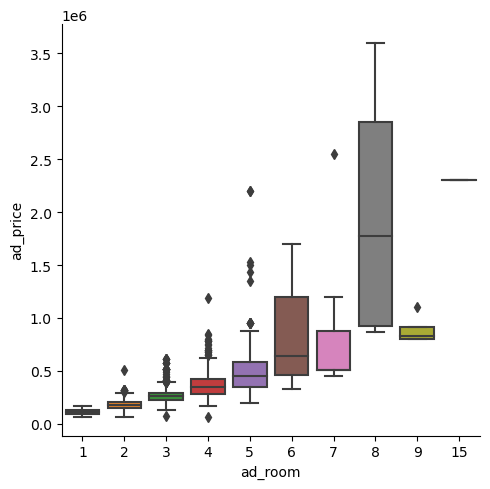

In [45]:
#Otaq saylarına görə qiymətlərin paylanmasının təyin edilməsi
sns.catplot(x="ad_room", y="ad_price", kind="box", data=df);

In [46]:
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,1,0,0.000,296684.896,254,7,17
1,60.000,1,110000.000,0,0,0.000,250377.430,244,12,16
2,80.000,2,250000.000,1,0,1.000,301327.089,81,6,16
3,180.000,5,595000.000,1,0,1.000,340242.842,148,4,8
4,79.000,2,195000.000,1,1,1.000,287035.704,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,1,0,1.000,241534.643,75,11,22
2993,157.000,3,205000.000,0,0,0.000,287035.704,151,18,18
2994,115.000,2,229000.000,1,1,0.000,276133.700,112,4,16
2995,130.000,4,299000.000,1,0,1.000,253736.688,139,12,17


##### Son olaraq ad_price dəyişənindəki outlierları müəyyən edək onları vizuallaşdıraq və qurulacaq modeldə bizə problem yaratması deyə onları üst maksimum və alt maksimuma bərabər edək 

Kvartillər arası məsafə : 116000.0 

********************************


- Aşağı minimum limit 20000.0, 
- Yuxarı maksimum limit 484000.0'dir.

****************************************


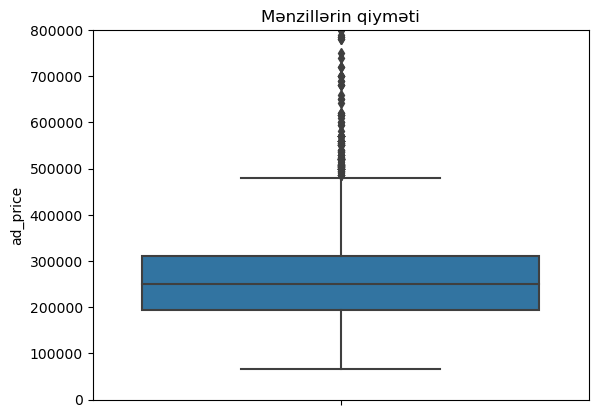

In [47]:
#Q1 və Q3 quantillərinin müəyyən edilməsi
Q1 = df["ad_price"].quantile(0.25)
Q3 = df["ad_price"].quantile(0.75)
IQR = Q3-Q1
print(f"Kvartillər arası məsafə : {IQR} \n")
print("********************************\n")
low_limit = np.round_(Q1- 1.5*IQR, 2)
upper_limit = np.round_(Q3 + 1.5*IQR, 2)
print(f"""
- Aşağı minimum limit {low_limit}, 
- Yuxarı maksimum limit {upper_limit}'dir.""")
print("\n****************************************")
ax = sns.boxplot(data = df, y = "ad_price");
ax.set_title('Mənzillərin qiyməti');
plt.ylim(0, 800000);

In [48]:
#Outlierların yuxarı və aşağı maksimumla əvəz olunması
df.loc[df['ad_price'] < low_limit, 'ad_price'] = low_limit
df.loc[df['ad_price'] > upper_limit, 'ad_price'] = upper_limit
df

,ad_square,ad_room,ad_price,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,107.300,2,185000.000,1,0,0.000,296684.896,254,7,17
1,60.000,1,110000.000,0,0,0.000,250377.430,244,12,16
2,80.000,2,250000.000,1,0,1.000,301327.089,81,6,16
3,180.000,5,484000.000,1,0,1.000,340242.842,148,4,8
4,79.000,2,195000.000,1,1,1.000,287035.704,789,14,16
...,...,...,...,...,...,...,...,...,...,...
2992,123.000,3,278000.000,1,0,1.000,241534.643,75,11,22
2993,157.000,3,205000.000,0,0,0.000,287035.704,151,18,18
2994,115.000,2,229000.000,1,1,0.000,276133.700,112,4,16
2995,130.000,4,299000.000,1,0,1.000,253736.688,139,12,17


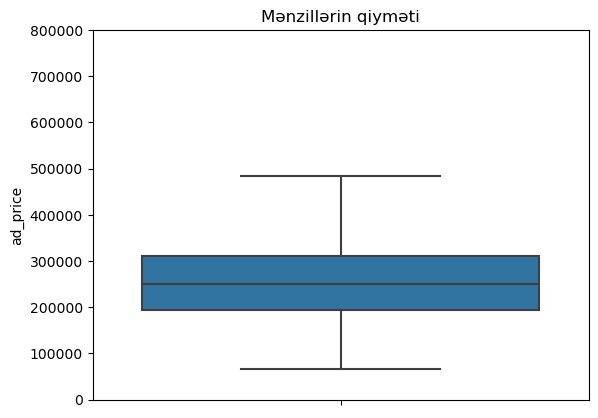

In [49]:
#Göründüyü kimi artıq outlier yoxdur
ax = sns.boxplot(data = df, y = "ad_price");
ax.set_title('Mənzillərin qiyməti');
plt.ylim(0, 800000);

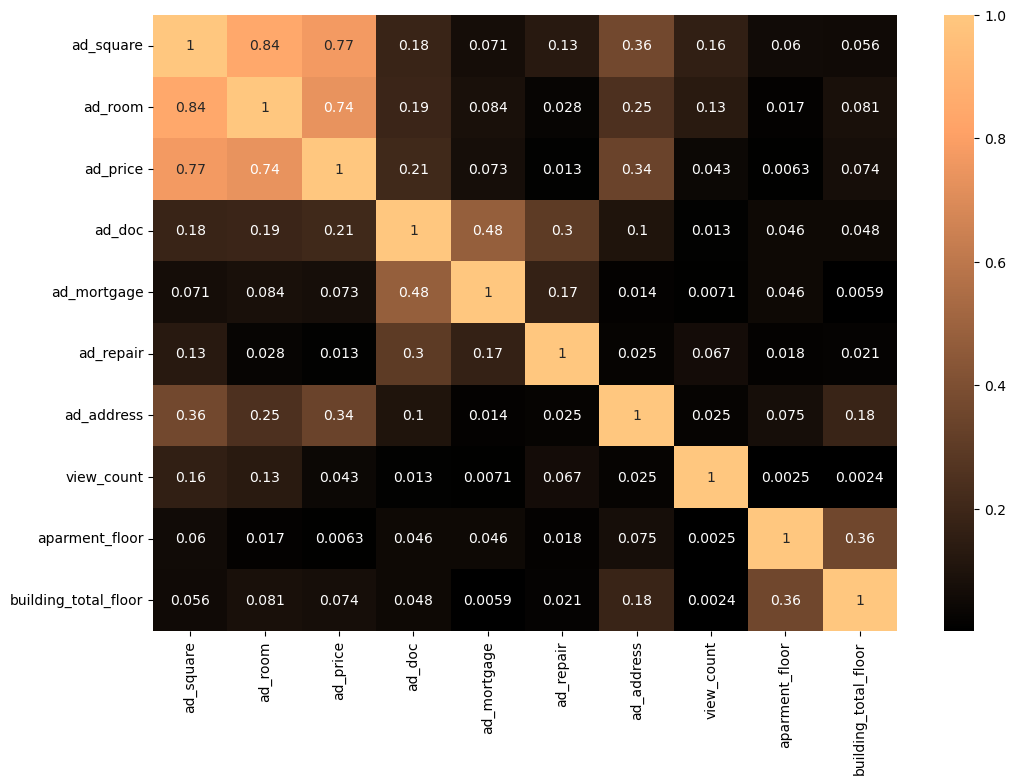

In [50]:
#dəyişənlər arasındakı əlaqənin vizuallaşdırılması(heatmap vasitəsilə)
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(abs(df.corr()), annot = True, linewidths = 0., cmap = "copper");

###### Datada ola biləcək potensial errorların müəyyən edilməsi

Biz datasetdə əsas dəyişənlər fərz edə biləcəyimiz ad_room/ad_price/ad_square/ad_doc/ad_repair/ parametrlərinə görə klasterizasiya edib, anomaliyaları müəyyən edə bilərik. Dbscan alqoritmi ilə klasterlərə ayrılma baş verdikdən sonra klasterlərdən kənarlaşmaları anomaliya kimi qiymətləndirib, datanın doğruluğu yoxlana və errorlar müəyyən edilə bilər.

In [51]:
# Datanın alqoritm üçün standart normal paylanma formasında scale olunması(z-score)
scaled_data_for_clustering = StandardScaler().fit_transform(df[['ad_room','ad_price','ad_square','ad_doc','ad_repair']])
scaled_data_for_clustering

array([[-0.94832093, -0.80155743, -0.2836628 ,  0.70657599, -1.62528622],
       [-1.98407816, -1.60332724, -0.98689587, -1.41527595, -1.62528622],
       [-0.94832093, -0.10669027, -0.68954573,  0.70657599,  0.61527624],
       ...,
       [-0.94832093, -0.33118581, -0.169183  ,  0.70657599, -1.62528622],
       [ 1.12319352,  0.41713268,  0.0538296 ,  0.70657599,  0.61527624],
       [ 0.0874363 , -0.22428317,  0.0538296 , -1.41527595,  0.61527624]])

In [52]:
epsilon = 1 # eyni klasterdə olan iki observation unit arasındakı maksimum məsafə
min_samples = 5  # klaster bir bölgə yaratmaq üçün tələb olunan minimum observation unit sayı

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data_for_clustering)
labels = dbscan.labels_
anomalies = df[labels == -1]
#Anomaliyaların təyin edilməsi
print("Number of anomalies detected:", len(anomalies))
print(anomalies)
#Anomaliya kimi detect olan observation unitlər əsasən qiymət/sahə və otaq sayı nöqteyi nəzərindən digərlərindən kəskin 
#fərqlənən uc dəyərlərdir. Buradan outlier dəyərlərlə anomaliyalar arasındakı oxşarlıq əlaqəsini də görə bilərik

Number of anomalies detected: 30
      ad_square  ad_room   ad_price  ad_doc  ad_mortgage  ad_repair  \
162     500.000        9 484000.000       1            0      1.000   
379     246.900        5 484000.000       0            0      0.000   
521     570.000        8 484000.000       1            0      1.000   
525     439.900        4 484000.000       1            1      0.000   
544     450.000        5 484000.000       1            0      1.000   
596     202.000        5 484000.000       1            0      0.000   
699     380.000        7 484000.000       1            1      0.000   
841     530.000        8 484000.000       1            1      1.000   
868     215.000        5 484000.000       0            0      1.000   
1214    310.000        6 484000.000       0            0      1.000   
1260    500.000        9 484000.000       1            1      1.000   
1323   1050.000       15 484000.000       1            1      1.000   
1416    784.000        8 484000.000       1 

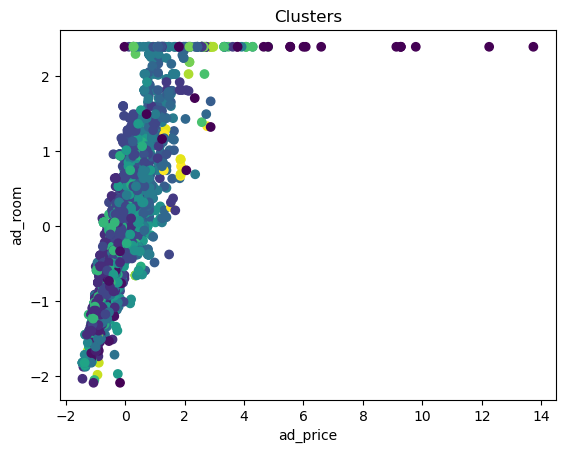

In [53]:
#Alqoritm ilə ayrılan klasterlərin vizuallaşdırılması
idx_price = df.columns.get_loc('ad_price')
idx_room = df.columns.get_loc('ad_room')
plt.scatter(scaled_data_for_clustering[:, idx_price], scaled_data_for_clustering[:, idx_room], c=clusters, cmap='viridis')
plt.xlabel('ad_price')
plt.ylabel('ad_room')
plt.title('Clusters')
plt.show()

### 3) Datanın modelləşdirilməsi

In [54]:
#Target and exploratory variable-lara görə datasetin bölünməsi
X = df.drop('ad_price', axis = 1) #independent features
y = df['ad_price'] #dependent feature

In [55]:
#Dataseti test ve train olaraq iki setə ayrılması (80%: train, 20%: test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    random_state = 100)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2397, 9)
(600, 9)
(2397,)
(600,)


In [57]:
#Datasetlərin MinMax Scale edilməsi
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [58]:
X_test_scaled.head()

,ad_square,ad_room,ad_doc,ad_mortgage,ad_repair,ad_address,view_count,aparment_floor,building_total_floor
0,0.078,0.143,0.000,0.000,1.000,0.073,0.009,0.429,0.720
1,0.343,0.429,1.000,1.000,0.000,1.000,0.002,0.524,0.480
2,0.052,0.143,1.000,0.000,1.000,0.045,0.010,0.571,0.640
3,0.066,0.143,0.000,0.000,1.000,0.045,0.008,0.143,0.600
4,0.093,0.143,0.000,0.000,1.000,0.082,0.051,0.286,0.600


In [59]:
#İstədiyimiz ML modellərini müəyyən edək və modelləri fit edən edən bir funksiya yazaq
models = {'Linear Regression' : LinearRegression(),
          'Lasso Regression' : Lasso(),
          'Ridge Regression' : Ridge(),
          'Least Angle Regression' : Lars(),
          'SVR' : SVR(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'LightGBM' : LGBMRegressor(),
          'CatBoost' : CatBoostRegressor()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
  model_R2 = {}
  model_MAE = {}
  model_MSE = {}
  model_RMSE = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    model_R2[name] =  r2_score(y_test, preds)
    model_MAE[name] = mean_absolute_error(y_test, preds)
    model_MSE[name] = mean_squared_error(y_test, preds)
    model_RMSE[name] = mean_squared_error(y_test, preds, squared = False)

  return model_R2, model_MAE, model_MSE, model_RMSE

In [60]:
#Yazdığımız funksiya ilə datamızı fit edək və evaluation metriklərinə baxaq
model_scores = fit_and_score(models = models,
                             X_train = X_train_scaled,
                             y_train = y_train,
                             X_test  = X_test_scaled,
                             y_test  = y_test)

Learning rate set to 0.047007
0:	learn: 91467.6270629	total: 169ms	remaining: 2m 49s
1:	learn: 88487.6113699	total: 176ms	remaining: 1m 27s
2:	learn: 85635.9218693	total: 181ms	remaining: 1m
3:	learn: 82883.8184391	total: 185ms	remaining: 46s
4:	learn: 80411.2583168	total: 188ms	remaining: 37.5s
5:	learn: 78102.5217990	total: 192ms	remaining: 31.9s
6:	learn: 75726.8954562	total: 196ms	remaining: 27.8s
7:	learn: 73587.6292916	total: 199ms	remaining: 24.7s
8:	learn: 71538.2036080	total: 202ms	remaining: 22.3s
9:	learn: 69753.8458597	total: 205ms	remaining: 20.3s
10:	learn: 67909.8253710	total: 208ms	remaining: 18.7s
11:	learn: 66303.9787623	total: 210ms	remaining: 17.3s
12:	learn: 64841.1363406	total: 212ms	remaining: 16.1s
13:	learn: 63334.9914665	total: 214ms	remaining: 15.1s
14:	learn: 61874.6509293	total: 216ms	remaining: 14.2s
15:	learn: 60414.9601663	total: 217ms	remaining: 13.4s
16:	learn: 59154.7806736	total: 219ms	remaining: 12.7s
17:	learn: 57982.3857991	total: 221ms	remaining:

230:	learn: 31596.0181301	total: 565ms	remaining: 1.88s
231:	learn: 31550.7668254	total: 567ms	remaining: 1.88s
232:	learn: 31518.4674036	total: 569ms	remaining: 1.87s
233:	learn: 31462.4371843	total: 570ms	remaining: 1.87s
234:	learn: 31448.1102682	total: 572ms	remaining: 1.86s
235:	learn: 31404.0038381	total: 573ms	remaining: 1.86s
236:	learn: 31396.1181740	total: 575ms	remaining: 1.85s
237:	learn: 31350.2085204	total: 576ms	remaining: 1.84s
238:	learn: 31338.5855650	total: 578ms	remaining: 1.84s
239:	learn: 31304.2879884	total: 580ms	remaining: 1.84s
240:	learn: 31286.9532752	total: 582ms	remaining: 1.83s
241:	learn: 31263.8119484	total: 583ms	remaining: 1.83s
242:	learn: 31236.9878339	total: 585ms	remaining: 1.82s
243:	learn: 31190.1315885	total: 587ms	remaining: 1.82s
244:	learn: 31135.3630057	total: 588ms	remaining: 1.81s
245:	learn: 31116.9106803	total: 590ms	remaining: 1.81s
246:	learn: 31110.5122215	total: 591ms	remaining: 1.8s
247:	learn: 31082.3957800	total: 593ms	remaining:

487:	learn: 25832.0684729	total: 956ms	remaining: 1s
488:	learn: 25801.1858896	total: 958ms	remaining: 1s
489:	learn: 25790.5000130	total: 959ms	remaining: 999ms
490:	learn: 25768.9058330	total: 961ms	remaining: 997ms
491:	learn: 25737.6108204	total: 963ms	remaining: 995ms
492:	learn: 25718.8968929	total: 965ms	remaining: 992ms
493:	learn: 25697.8348812	total: 966ms	remaining: 990ms
494:	learn: 25692.9506930	total: 968ms	remaining: 987ms
495:	learn: 25659.6089062	total: 969ms	remaining: 985ms
496:	learn: 25659.0237257	total: 971ms	remaining: 983ms
497:	learn: 25656.3093342	total: 973ms	remaining: 981ms
498:	learn: 25647.0276076	total: 975ms	remaining: 978ms
499:	learn: 25611.3666760	total: 976ms	remaining: 976ms
500:	learn: 25596.5706951	total: 978ms	remaining: 974ms
501:	learn: 25581.6975235	total: 980ms	remaining: 972ms
502:	learn: 25567.4711951	total: 982ms	remaining: 970ms
503:	learn: 25553.1032226	total: 983ms	remaining: 968ms
504:	learn: 25527.7519879	total: 985ms	remaining: 965m

746:	learn: 22199.0935634	total: 1.35s	remaining: 459ms
747:	learn: 22185.5397699	total: 1.36s	remaining: 457ms
748:	learn: 22172.3993272	total: 1.36s	remaining: 455ms
749:	learn: 22156.6370856	total: 1.36s	remaining: 453ms
750:	learn: 22129.9518076	total: 1.36s	remaining: 451ms
751:	learn: 22116.7470491	total: 1.36s	remaining: 449ms
752:	learn: 22111.8647390	total: 1.36s	remaining: 448ms
753:	learn: 22091.7857934	total: 1.36s	remaining: 446ms
754:	learn: 22082.0972670	total: 1.37s	remaining: 444ms
755:	learn: 22070.8576715	total: 1.37s	remaining: 442ms
756:	learn: 22062.7712557	total: 1.37s	remaining: 440ms
757:	learn: 22052.1941504	total: 1.37s	remaining: 438ms
758:	learn: 22042.3462645	total: 1.37s	remaining: 436ms
759:	learn: 22033.8643516	total: 1.38s	remaining: 434ms
760:	learn: 22019.9282865	total: 1.38s	remaining: 433ms
761:	learn: 22010.4402180	total: 1.38s	remaining: 431ms
762:	learn: 21997.7514607	total: 1.38s	remaining: 429ms
763:	learn: 21985.5536164	total: 1.38s	remaining

987:	learn: 19725.6309562	total: 1.73s	remaining: 21ms
988:	learn: 19712.4171262	total: 1.73s	remaining: 19.3ms
989:	learn: 19706.3352167	total: 1.74s	remaining: 17.5ms
990:	learn: 19699.2236965	total: 1.74s	remaining: 15.8ms
991:	learn: 19693.4130855	total: 1.74s	remaining: 14ms
992:	learn: 19689.4246647	total: 1.74s	remaining: 12.3ms
993:	learn: 19677.2345069	total: 1.74s	remaining: 10.5ms
994:	learn: 19668.2326772	total: 1.74s	remaining: 8.76ms
995:	learn: 19647.0973719	total: 1.74s	remaining: 7.01ms
996:	learn: 19645.9017792	total: 1.75s	remaining: 5.25ms
997:	learn: 19631.2818778	total: 1.75s	remaining: 3.5ms
998:	learn: 19618.6345589	total: 1.75s	remaining: 1.75ms
999:	learn: 19610.7884178	total: 1.75s	remaining: 0us


In [61]:
model_scores

({'Linear Regression': 0.6282015060163129,
  'Lasso Regression': 0.6282181505035687,
  'Ridge Regression': 0.628658412557981,
  'Least Angle Regression': 0.628201506016313,
  'SVR': -0.026841695281766942,
  'KNeighborsRegressor': 0.6805073717367984,
  'RandomForestRegressor': 0.8354540059535495,
  'LightGBM': 0.8456169890041049,
  'CatBoost': 0.8443934337733303},
 {'Linear Regression': 38590.87557667499,
  'Lasso Regression': 38591.42211141004,
  'Ridge Regression': 39420.32324127094,
  'Least Angle Regression': 38590.87557667499,
  'SVR': 67971.43193048827,
  'KNeighborsRegressor': 34942.325333333334,
  'RandomForestRegressor': 23213.60995,
  'LightGBM': 23934.62322379758,
  'CatBoost': 24012.569350908678},
 {'Linear Regression': 2987437057.81448,
  'Lasso Regression': 2987303317.7406473,
  'Ridge Regression': 2983765769.3164773,
  'Least Angle Regression': 2987437057.8144794,
  'SVR': 8250772885.401706,
  'KNeighborsRegressor': 2567154339.8288,
  'RandomForestRegressor': 1322143064.8

Ən yaxşı nəticələri RandomForestRegressor, LightGBM ve CatBoost verir, daha dəqiq olması üçün cross validation ilə yenidən test edək

In [62]:
#Cross Validation ile Model Performansı
models = {'Linear Regression' : LinearRegression(), #name, model
          'Lasso Regression' : Lasso(),
          'Ridge Regression' : Ridge(),
          'Least Angle Regression' : Lars(),
          'SVR' : SVR(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'LightGBM' : LGBMRegressor(),
          'CatBoost' : CatBoostRegressor()}

def fit_and_cv(models, X_train, y_train, X, y):
  cv_R2 = {}

  for name, model in models.items():
    model_reg = model.fit(X_train, y_train)
    cv_R2[name] = np.mean(cross_val_score(model_reg, X, y, cv=10, scoring='r2'))

  return cv_R2

In [63]:
cv_scores = fit_and_cv(models = models,
                      X_train = X_train_scaled,
                      y_train = y_train,
                      X  = X_scaled,
                      y  = y)

Learning rate set to 0.047007
0:	learn: 91467.6270629	total: 1.96ms	remaining: 1.96s
1:	learn: 88487.6113699	total: 3.88ms	remaining: 1.93s
2:	learn: 85635.9218693	total: 5.8ms	remaining: 1.93s
3:	learn: 82883.8184391	total: 7.51ms	remaining: 1.87s
4:	learn: 80411.2583168	total: 9.37ms	remaining: 1.86s
5:	learn: 78102.5217990	total: 11.1ms	remaining: 1.84s
6:	learn: 75726.8954562	total: 13ms	remaining: 1.84s
7:	learn: 73587.6292916	total: 14.8ms	remaining: 1.83s
8:	learn: 71538.2036080	total: 16.7ms	remaining: 1.84s
9:	learn: 69753.8458597	total: 18.4ms	remaining: 1.82s
10:	learn: 67909.8253710	total: 20.1ms	remaining: 1.8s
11:	learn: 66303.9787623	total: 21.9ms	remaining: 1.8s
12:	learn: 64841.1363406	total: 23.7ms	remaining: 1.8s
13:	learn: 63334.9914665	total: 25.6ms	remaining: 1.8s
14:	learn: 61874.6509293	total: 27.5ms	remaining: 1.8s
15:	learn: 60414.9601663	total: 29.3ms	remaining: 1.8s
16:	learn: 59154.7806736	total: 31.2ms	remaining: 1.8s
17:	learn: 57982.3857991	total: 32.9ms

219:	learn: 31842.0214739	total: 378ms	remaining: 1.34s
220:	learn: 31832.3288129	total: 380ms	remaining: 1.34s
221:	learn: 31814.1628805	total: 381ms	remaining: 1.34s
222:	learn: 31762.2308678	total: 383ms	remaining: 1.33s
223:	learn: 31718.5820463	total: 384ms	remaining: 1.33s
224:	learn: 31692.4294749	total: 386ms	remaining: 1.33s
225:	learn: 31659.4981200	total: 388ms	remaining: 1.33s
226:	learn: 31647.1381352	total: 390ms	remaining: 1.33s
227:	learn: 31629.9428030	total: 391ms	remaining: 1.32s
228:	learn: 31623.9462806	total: 393ms	remaining: 1.32s
229:	learn: 31613.7088155	total: 395ms	remaining: 1.32s
230:	learn: 31596.0181301	total: 396ms	remaining: 1.32s
231:	learn: 31550.7668254	total: 398ms	remaining: 1.32s
232:	learn: 31518.4674036	total: 400ms	remaining: 1.32s
233:	learn: 31462.4371843	total: 402ms	remaining: 1.32s
234:	learn: 31448.1102682	total: 404ms	remaining: 1.31s
235:	learn: 31404.0038381	total: 406ms	remaining: 1.31s
236:	learn: 31396.1181740	total: 407ms	remaining

440:	learn: 26571.9562982	total: 764ms	remaining: 969ms
441:	learn: 26555.6608268	total: 766ms	remaining: 967ms
442:	learn: 26555.3115396	total: 767ms	remaining: 965ms
443:	learn: 26544.2085035	total: 769ms	remaining: 963ms
444:	learn: 26508.3644248	total: 771ms	remaining: 962ms
445:	learn: 26492.7833382	total: 773ms	remaining: 960ms
446:	learn: 26492.2589933	total: 774ms	remaining: 958ms
447:	learn: 26476.4698314	total: 776ms	remaining: 956ms
448:	learn: 26461.3769660	total: 778ms	remaining: 954ms
449:	learn: 26450.3970726	total: 779ms	remaining: 953ms
450:	learn: 26430.7970600	total: 781ms	remaining: 951ms
451:	learn: 26420.9835326	total: 783ms	remaining: 949ms
452:	learn: 26386.7973490	total: 785ms	remaining: 948ms
453:	learn: 26349.3184671	total: 787ms	remaining: 946ms
454:	learn: 26337.8817297	total: 788ms	remaining: 944ms
455:	learn: 26335.1702637	total: 790ms	remaining: 943ms
456:	learn: 26314.3206984	total: 792ms	remaining: 941ms
457:	learn: 26313.7143190	total: 793ms	remaining

662:	learn: 23212.0279194	total: 1.14s	remaining: 579ms
663:	learn: 23201.7279379	total: 1.14s	remaining: 578ms
664:	learn: 23194.4090048	total: 1.14s	remaining: 576ms
665:	learn: 23185.3516733	total: 1.15s	remaining: 574ms
666:	learn: 23166.6376340	total: 1.15s	remaining: 573ms
667:	learn: 23157.4631886	total: 1.15s	remaining: 571ms
668:	learn: 23151.6009634	total: 1.15s	remaining: 569ms
669:	learn: 23142.9643110	total: 1.15s	remaining: 567ms
670:	learn: 23130.0571528	total: 1.15s	remaining: 566ms
671:	learn: 23122.9938122	total: 1.16s	remaining: 564ms
672:	learn: 23118.5682003	total: 1.16s	remaining: 562ms
673:	learn: 23106.3119609	total: 1.16s	remaining: 560ms
674:	learn: 23093.3693522	total: 1.16s	remaining: 559ms
675:	learn: 23081.7240863	total: 1.16s	remaining: 557ms
676:	learn: 23068.7545950	total: 1.16s	remaining: 555ms
677:	learn: 23049.1837022	total: 1.17s	remaining: 554ms
678:	learn: 23032.5700463	total: 1.17s	remaining: 552ms
679:	learn: 23024.3264983	total: 1.17s	remaining

888:	learn: 20593.5453224	total: 1.53s	remaining: 192ms
889:	learn: 20577.8743801	total: 1.54s	remaining: 190ms
890:	learn: 20566.7688390	total: 1.54s	remaining: 188ms
891:	learn: 20555.8775771	total: 1.54s	remaining: 187ms
892:	learn: 20548.9199299	total: 1.54s	remaining: 185ms
893:	learn: 20542.2354333	total: 1.54s	remaining: 183ms
894:	learn: 20536.1214583	total: 1.55s	remaining: 181ms
895:	learn: 20523.1164098	total: 1.55s	remaining: 180ms
896:	learn: 20505.6623954	total: 1.55s	remaining: 178ms
897:	learn: 20499.2493156	total: 1.55s	remaining: 176ms
898:	learn: 20493.0965424	total: 1.55s	remaining: 175ms
899:	learn: 20485.0843099	total: 1.56s	remaining: 173ms
900:	learn: 20477.8643883	total: 1.56s	remaining: 171ms
901:	learn: 20469.6206835	total: 1.56s	remaining: 170ms
902:	learn: 20461.1642420	total: 1.56s	remaining: 168ms
903:	learn: 20452.7727925	total: 1.56s	remaining: 166ms
904:	learn: 20447.5319352	total: 1.57s	remaining: 164ms
905:	learn: 20438.5650616	total: 1.57s	remaining

77:	learn: 38029.9974718	total: 139ms	remaining: 1.65s
78:	learn: 37943.8179620	total: 141ms	remaining: 1.65s
79:	learn: 37873.1165311	total: 143ms	remaining: 1.65s
80:	learn: 37812.0205749	total: 145ms	remaining: 1.65s
81:	learn: 37754.4457357	total: 147ms	remaining: 1.65s
82:	learn: 37669.2573470	total: 149ms	remaining: 1.64s
83:	learn: 37612.8550219	total: 150ms	remaining: 1.64s
84:	learn: 37530.9172850	total: 152ms	remaining: 1.64s
85:	learn: 37485.5989424	total: 154ms	remaining: 1.64s
86:	learn: 37430.9064809	total: 156ms	remaining: 1.64s
87:	learn: 37376.4038616	total: 158ms	remaining: 1.63s
88:	learn: 37314.3931244	total: 159ms	remaining: 1.63s
89:	learn: 37268.4008283	total: 161ms	remaining: 1.63s
90:	learn: 37190.3825503	total: 176ms	remaining: 1.76s
91:	learn: 37135.2806013	total: 181ms	remaining: 1.79s
92:	learn: 37110.2871416	total: 185ms	remaining: 1.8s
93:	learn: 37040.8978123	total: 187ms	remaining: 1.8s
94:	learn: 36975.7815781	total: 189ms	remaining: 1.8s
95:	learn: 36

272:	learn: 30487.1250424	total: 517ms	remaining: 1.38s
273:	learn: 30452.0333745	total: 519ms	remaining: 1.38s
274:	learn: 30397.6866564	total: 521ms	remaining: 1.37s
275:	learn: 30359.3706614	total: 523ms	remaining: 1.37s
276:	learn: 30316.9204108	total: 525ms	remaining: 1.37s
277:	learn: 30285.0040060	total: 527ms	remaining: 1.37s
278:	learn: 30259.6547582	total: 529ms	remaining: 1.37s
279:	learn: 30234.3630705	total: 531ms	remaining: 1.36s
280:	learn: 30206.3004323	total: 533ms	remaining: 1.36s
281:	learn: 30171.1016514	total: 535ms	remaining: 1.36s
282:	learn: 30151.5552104	total: 537ms	remaining: 1.36s
283:	learn: 30112.6591373	total: 539ms	remaining: 1.36s
284:	learn: 30071.9203600	total: 541ms	remaining: 1.36s
285:	learn: 30034.8567265	total: 542ms	remaining: 1.35s
286:	learn: 30000.7250229	total: 544ms	remaining: 1.35s
287:	learn: 29976.3702667	total: 547ms	remaining: 1.35s
288:	learn: 29954.2658128	total: 548ms	remaining: 1.35s
289:	learn: 29926.6997477	total: 550ms	remaining

493:	learn: 25874.9510133	total: 907ms	remaining: 929ms
494:	learn: 25857.4072562	total: 909ms	remaining: 928ms
495:	learn: 25822.9477126	total: 911ms	remaining: 926ms
496:	learn: 25818.6507516	total: 913ms	remaining: 924ms
497:	learn: 25803.1667536	total: 915ms	remaining: 922ms
498:	learn: 25786.2870999	total: 916ms	remaining: 920ms
499:	learn: 25761.0095477	total: 918ms	remaining: 918ms
500:	learn: 25727.2508598	total: 920ms	remaining: 916ms
501:	learn: 25713.7986963	total: 922ms	remaining: 915ms
502:	learn: 25693.2762862	total: 924ms	remaining: 913ms
503:	learn: 25675.0789605	total: 926ms	remaining: 911ms
504:	learn: 25667.4329170	total: 927ms	remaining: 909ms
505:	learn: 25657.3453671	total: 929ms	remaining: 907ms
506:	learn: 25643.7616639	total: 931ms	remaining: 905ms
507:	learn: 25632.9045490	total: 932ms	remaining: 903ms
508:	learn: 25627.9903937	total: 934ms	remaining: 901ms
509:	learn: 25611.4957079	total: 935ms	remaining: 899ms
510:	learn: 25601.9045438	total: 937ms	remaining

729:	learn: 22564.8741874	total: 1.29s	remaining: 476ms
730:	learn: 22552.1565237	total: 1.29s	remaining: 474ms
731:	learn: 22542.9132574	total: 1.29s	remaining: 472ms
732:	learn: 22517.5573881	total: 1.29s	remaining: 471ms
733:	learn: 22505.6856297	total: 1.29s	remaining: 469ms
734:	learn: 22497.3437439	total: 1.29s	remaining: 467ms
735:	learn: 22482.8782201	total: 1.3s	remaining: 465ms
736:	learn: 22473.2052487	total: 1.3s	remaining: 463ms
737:	learn: 22459.3905274	total: 1.3s	remaining: 462ms
738:	learn: 22441.1195945	total: 1.3s	remaining: 460ms
739:	learn: 22421.1181396	total: 1.3s	remaining: 458ms
740:	learn: 22413.7474543	total: 1.3s	remaining: 456ms
741:	learn: 22407.6385542	total: 1.31s	remaining: 454ms
742:	learn: 22399.6406778	total: 1.31s	remaining: 453ms
743:	learn: 22393.2630372	total: 1.31s	remaining: 451ms
744:	learn: 22370.9297762	total: 1.31s	remaining: 449ms
745:	learn: 22356.5108181	total: 1.31s	remaining: 447ms
746:	learn: 22348.0822257	total: 1.31s	remaining: 445m

962:	learn: 20302.4130388	total: 1.67s	remaining: 64.3ms
963:	learn: 20293.6821793	total: 1.67s	remaining: 62.5ms
964:	learn: 20280.7263577	total: 1.68s	remaining: 60.8ms
965:	learn: 20274.7303506	total: 1.68s	remaining: 59.1ms
966:	learn: 20265.1711538	total: 1.68s	remaining: 57.3ms
967:	learn: 20260.2553442	total: 1.68s	remaining: 55.6ms
968:	learn: 20250.7970699	total: 1.68s	remaining: 53.8ms
969:	learn: 20237.3106579	total: 1.68s	remaining: 52.1ms
970:	learn: 20224.7152511	total: 1.69s	remaining: 50.4ms
971:	learn: 20218.4793768	total: 1.69s	remaining: 48.6ms
972:	learn: 20210.5113471	total: 1.69s	remaining: 46.9ms
973:	learn: 20201.5226153	total: 1.69s	remaining: 45.2ms
974:	learn: 20194.1768615	total: 1.69s	remaining: 43.4ms
975:	learn: 20188.9532706	total: 1.7s	remaining: 41.7ms
976:	learn: 20176.6381467	total: 1.7s	remaining: 40ms
977:	learn: 20170.9013824	total: 1.7s	remaining: 38.3ms
978:	learn: 20163.4458865	total: 1.7s	remaining: 36.5ms
979:	learn: 20155.8192441	total: 1.7s

175:	learn: 33174.0411271	total: 284ms	remaining: 1.33s
176:	learn: 33154.7568544	total: 286ms	remaining: 1.33s
177:	learn: 33098.4827870	total: 288ms	remaining: 1.33s
178:	learn: 33064.3171194	total: 290ms	remaining: 1.33s
179:	learn: 33014.4199728	total: 291ms	remaining: 1.33s
180:	learn: 32978.7619902	total: 293ms	remaining: 1.33s
181:	learn: 32943.1509009	total: 295ms	remaining: 1.32s
182:	learn: 32917.7811784	total: 296ms	remaining: 1.32s
183:	learn: 32892.4971030	total: 298ms	remaining: 1.32s
184:	learn: 32850.6983144	total: 300ms	remaining: 1.32s
185:	learn: 32790.1406314	total: 302ms	remaining: 1.32s
186:	learn: 32751.0871204	total: 303ms	remaining: 1.32s
187:	learn: 32720.3597258	total: 305ms	remaining: 1.32s
188:	learn: 32689.5931669	total: 307ms	remaining: 1.32s
189:	learn: 32663.3882492	total: 308ms	remaining: 1.31s
190:	learn: 32626.2262053	total: 310ms	remaining: 1.31s
191:	learn: 32575.8295701	total: 312ms	remaining: 1.31s
192:	learn: 32549.9331759	total: 313ms	remaining

423:	learn: 27021.1875441	total: 684ms	remaining: 930ms
424:	learn: 26989.2917534	total: 686ms	remaining: 929ms
425:	learn: 26966.6058638	total: 688ms	remaining: 927ms
426:	learn: 26966.2309400	total: 689ms	remaining: 925ms
427:	learn: 26961.0414961	total: 691ms	remaining: 923ms
428:	learn: 26948.5470277	total: 693ms	remaining: 922ms
429:	learn: 26917.5523393	total: 694ms	remaining: 920ms
430:	learn: 26902.6812763	total: 696ms	remaining: 919ms
431:	learn: 26865.9150948	total: 698ms	remaining: 917ms
432:	learn: 26857.5820882	total: 699ms	remaining: 916ms
433:	learn: 26847.5381953	total: 701ms	remaining: 914ms
434:	learn: 26823.1856193	total: 703ms	remaining: 913ms
435:	learn: 26799.3335051	total: 705ms	remaining: 912ms
436:	learn: 26781.5138505	total: 706ms	remaining: 910ms
437:	learn: 26769.1902239	total: 708ms	remaining: 909ms
438:	learn: 26744.5497259	total: 710ms	remaining: 907ms
439:	learn: 26730.7538716	total: 712ms	remaining: 906ms
440:	learn: 26701.3902761	total: 713ms	remaining

643:	learn: 23455.6030680	total: 1.07s	remaining: 591ms
644:	learn: 23444.2255289	total: 1.07s	remaining: 589ms
645:	learn: 23424.7757731	total: 1.07s	remaining: 588ms
646:	learn: 23410.3152969	total: 1.07s	remaining: 586ms
647:	learn: 23397.1438701	total: 1.08s	remaining: 585ms
648:	learn: 23390.4920195	total: 1.08s	remaining: 583ms
649:	learn: 23362.3714776	total: 1.08s	remaining: 581ms
650:	learn: 23345.4216909	total: 1.08s	remaining: 580ms
651:	learn: 23331.1745379	total: 1.08s	remaining: 578ms
652:	learn: 23317.7035472	total: 1.08s	remaining: 576ms
653:	learn: 23312.2620306	total: 1.09s	remaining: 575ms
654:	learn: 23300.6463419	total: 1.09s	remaining: 573ms
655:	learn: 23277.4309522	total: 1.09s	remaining: 571ms
656:	learn: 23272.9858683	total: 1.09s	remaining: 570ms
657:	learn: 23258.4487221	total: 1.09s	remaining: 568ms
658:	learn: 23242.0697157	total: 1.09s	remaining: 567ms
659:	learn: 23230.3386852	total: 1.1s	remaining: 565ms
660:	learn: 23219.4674623	total: 1.1s	remaining: 

877:	learn: 20750.5409379	total: 1.47s	remaining: 204ms
878:	learn: 20729.7792382	total: 1.47s	remaining: 203ms
879:	learn: 20714.4994474	total: 1.47s	remaining: 201ms
880:	learn: 20704.3809212	total: 1.48s	remaining: 199ms
881:	learn: 20693.9939613	total: 1.48s	remaining: 198ms
882:	learn: 20687.1426224	total: 1.48s	remaining: 196ms
883:	learn: 20679.8827499	total: 1.48s	remaining: 194ms
884:	learn: 20671.4038818	total: 1.48s	remaining: 193ms
885:	learn: 20658.1792460	total: 1.48s	remaining: 191ms
886:	learn: 20651.7053514	total: 1.49s	remaining: 189ms
887:	learn: 20634.8316600	total: 1.49s	remaining: 188ms
888:	learn: 20630.1353172	total: 1.49s	remaining: 186ms
889:	learn: 20615.6093965	total: 1.49s	remaining: 184ms
890:	learn: 20606.0770277	total: 1.49s	remaining: 183ms
891:	learn: 20597.1650863	total: 1.49s	remaining: 181ms
892:	learn: 20589.1592539	total: 1.5s	remaining: 179ms
893:	learn: 20583.2602674	total: 1.5s	remaining: 178ms
894:	learn: 20565.3347615	total: 1.5s	remaining: 1

87:	learn: 37024.3453138	total: 145ms	remaining: 1.5s
88:	learn: 36966.1161621	total: 148ms	remaining: 1.51s
89:	learn: 36896.7593688	total: 150ms	remaining: 1.51s
90:	learn: 36822.3121514	total: 152ms	remaining: 1.51s
91:	learn: 36759.9483313	total: 154ms	remaining: 1.51s
92:	learn: 36691.9469065	total: 155ms	remaining: 1.51s
93:	learn: 36619.9669797	total: 157ms	remaining: 1.51s
94:	learn: 36556.3297673	total: 159ms	remaining: 1.51s
95:	learn: 36477.0758330	total: 161ms	remaining: 1.51s
96:	learn: 36424.0068339	total: 163ms	remaining: 1.51s
97:	learn: 36373.9850325	total: 164ms	remaining: 1.51s
98:	learn: 36332.2875257	total: 166ms	remaining: 1.51s
99:	learn: 36234.5772160	total: 168ms	remaining: 1.51s
100:	learn: 36186.7674087	total: 170ms	remaining: 1.51s
101:	learn: 36125.4829492	total: 172ms	remaining: 1.51s
102:	learn: 36081.6316206	total: 174ms	remaining: 1.52s
103:	learn: 35989.1791965	total: 176ms	remaining: 1.52s
104:	learn: 35917.3832616	total: 178ms	remaining: 1.52s
105:	l

315:	learn: 28901.0795218	total: 535ms	remaining: 1.16s
316:	learn: 28887.5113207	total: 537ms	remaining: 1.16s
317:	learn: 28842.8801306	total: 538ms	remaining: 1.15s
318:	learn: 28822.4969508	total: 540ms	remaining: 1.15s
319:	learn: 28809.8649299	total: 542ms	remaining: 1.15s
320:	learn: 28790.3151668	total: 544ms	remaining: 1.15s
321:	learn: 28748.2992967	total: 545ms	remaining: 1.15s
322:	learn: 28738.4550930	total: 547ms	remaining: 1.15s
323:	learn: 28722.9294538	total: 549ms	remaining: 1.14s
324:	learn: 28690.6481609	total: 550ms	remaining: 1.14s
325:	learn: 28674.4347364	total: 552ms	remaining: 1.14s
326:	learn: 28659.3805605	total: 554ms	remaining: 1.14s
327:	learn: 28641.0548486	total: 556ms	remaining: 1.14s
328:	learn: 28625.0429691	total: 557ms	remaining: 1.14s
329:	learn: 28601.6016864	total: 559ms	remaining: 1.14s
330:	learn: 28578.1487685	total: 561ms	remaining: 1.13s
331:	learn: 28560.4668113	total: 563ms	remaining: 1.13s
332:	learn: 28515.5253385	total: 565ms	remaining

538:	learn: 24639.7221356	total: 922ms	remaining: 789ms
539:	learn: 24605.9900237	total: 924ms	remaining: 788ms
540:	learn: 24590.7148430	total: 926ms	remaining: 786ms
541:	learn: 24577.9304612	total: 928ms	remaining: 784ms
542:	learn: 24570.4271719	total: 930ms	remaining: 783ms
543:	learn: 24536.8514798	total: 932ms	remaining: 781ms
544:	learn: 24521.5578189	total: 933ms	remaining: 779ms
545:	learn: 24508.0153603	total: 935ms	remaining: 778ms
546:	learn: 24494.5390764	total: 937ms	remaining: 776ms
547:	learn: 24477.3982717	total: 939ms	remaining: 774ms
548:	learn: 24463.3448115	total: 941ms	remaining: 773ms
549:	learn: 24451.1754924	total: 943ms	remaining: 771ms
550:	learn: 24441.6887324	total: 945ms	remaining: 770ms
551:	learn: 24425.0197128	total: 947ms	remaining: 768ms
552:	learn: 24409.3281088	total: 949ms	remaining: 767ms
553:	learn: 24402.8102413	total: 950ms	remaining: 765ms
554:	learn: 24375.8080798	total: 952ms	remaining: 763ms
555:	learn: 24365.5527976	total: 954ms	remaining

754:	learn: 21935.0781493	total: 1.31s	remaining: 425ms
755:	learn: 21930.5811132	total: 1.31s	remaining: 423ms
756:	learn: 21914.7249368	total: 1.31s	remaining: 422ms
757:	learn: 21903.5132072	total: 1.31s	remaining: 420ms
758:	learn: 21898.3087937	total: 1.32s	remaining: 418ms
759:	learn: 21890.5099828	total: 1.32s	remaining: 417ms
760:	learn: 21876.5533046	total: 1.32s	remaining: 415ms
761:	learn: 21863.6818465	total: 1.32s	remaining: 413ms
762:	learn: 21852.5307092	total: 1.32s	remaining: 412ms
763:	learn: 21837.9368855	total: 1.33s	remaining: 410ms
764:	learn: 21830.2628604	total: 1.33s	remaining: 408ms
765:	learn: 21825.8151168	total: 1.33s	remaining: 407ms
766:	learn: 21812.4099585	total: 1.33s	remaining: 405ms
767:	learn: 21797.6366925	total: 1.33s	remaining: 404ms
768:	learn: 21786.6168746	total: 1.34s	remaining: 402ms
769:	learn: 21776.1204599	total: 1.34s	remaining: 400ms
770:	learn: 21765.4769219	total: 1.34s	remaining: 399ms
771:	learn: 21757.6687995	total: 1.34s	remaining

943:	learn: 20186.9574737	total: 1.69s	remaining: 100ms
944:	learn: 20178.7619238	total: 1.7s	remaining: 98.7ms
945:	learn: 20170.7029774	total: 1.7s	remaining: 96.9ms
946:	learn: 20162.8290423	total: 1.7s	remaining: 95.2ms
947:	learn: 20146.9470894	total: 1.7s	remaining: 93.4ms
948:	learn: 20144.7576169	total: 1.7s	remaining: 91.6ms
949:	learn: 20136.0123078	total: 1.71s	remaining: 89.8ms
950:	learn: 20133.4727070	total: 1.71s	remaining: 88ms
951:	learn: 20123.2306997	total: 1.71s	remaining: 86.3ms
952:	learn: 20118.0046147	total: 1.71s	remaining: 84.5ms
953:	learn: 20105.2557995	total: 1.71s	remaining: 82.7ms
954:	learn: 20100.8249041	total: 1.72s	remaining: 80.9ms
955:	learn: 20090.9184921	total: 1.72s	remaining: 79.1ms
956:	learn: 20086.2350654	total: 1.72s	remaining: 77.4ms
957:	learn: 20079.7412988	total: 1.72s	remaining: 75.6ms
958:	learn: 20074.1556803	total: 1.73s	remaining: 73.8ms
959:	learn: 20067.5254243	total: 1.73s	remaining: 72ms
960:	learn: 20062.1754313	total: 1.73s	re

106:	learn: 35946.8887851	total: 225ms	remaining: 1.88s
107:	learn: 35886.0281737	total: 228ms	remaining: 1.88s
108:	learn: 35856.8247850	total: 230ms	remaining: 1.88s
109:	learn: 35803.9920862	total: 232ms	remaining: 1.88s
110:	learn: 35779.8796594	total: 234ms	remaining: 1.87s
111:	learn: 35726.8770325	total: 236ms	remaining: 1.87s
112:	learn: 35684.7572122	total: 238ms	remaining: 1.87s
113:	learn: 35640.1780773	total: 240ms	remaining: 1.87s
114:	learn: 35561.7831924	total: 242ms	remaining: 1.86s
115:	learn: 35497.7541842	total: 244ms	remaining: 1.86s
116:	learn: 35469.1106419	total: 246ms	remaining: 1.86s
117:	learn: 35408.6745242	total: 249ms	remaining: 1.86s
118:	learn: 35362.2751878	total: 251ms	remaining: 1.86s
119:	learn: 35327.1257032	total: 253ms	remaining: 1.85s
120:	learn: 35290.9611979	total: 255ms	remaining: 1.85s
121:	learn: 35277.1901229	total: 257ms	remaining: 1.85s
122:	learn: 35236.0315924	total: 259ms	remaining: 1.85s
123:	learn: 35194.7676899	total: 262ms	remaining

291:	learn: 29471.8433219	total: 618ms	remaining: 1.5s
292:	learn: 29442.9935218	total: 621ms	remaining: 1.5s
293:	learn: 29416.9000416	total: 623ms	remaining: 1.5s
294:	learn: 29370.9336338	total: 625ms	remaining: 1.49s
295:	learn: 29348.7516100	total: 628ms	remaining: 1.49s
296:	learn: 29334.5879452	total: 630ms	remaining: 1.49s
297:	learn: 29298.1053656	total: 632ms	remaining: 1.49s
298:	learn: 29278.3078539	total: 634ms	remaining: 1.49s
299:	learn: 29241.5309000	total: 637ms	remaining: 1.49s
300:	learn: 29203.1813792	total: 639ms	remaining: 1.48s
301:	learn: 29176.8128637	total: 642ms	remaining: 1.48s
302:	learn: 29146.7252210	total: 644ms	remaining: 1.48s
303:	learn: 29109.4133206	total: 647ms	remaining: 1.48s
304:	learn: 29093.5438536	total: 649ms	remaining: 1.48s
305:	learn: 29067.1423927	total: 652ms	remaining: 1.48s
306:	learn: 29057.8067298	total: 654ms	remaining: 1.48s
307:	learn: 29012.7903280	total: 657ms	remaining: 1.48s
308:	learn: 28983.6264421	total: 659ms	remaining: 1

450:	learn: 26455.7496957	total: 1.02s	remaining: 1.24s
451:	learn: 26420.6836132	total: 1.02s	remaining: 1.24s
452:	learn: 26415.8200865	total: 1.02s	remaining: 1.23s
453:	learn: 26402.1641107	total: 1.02s	remaining: 1.23s
454:	learn: 26374.7325110	total: 1.03s	remaining: 1.23s
455:	learn: 26363.2596308	total: 1.03s	remaining: 1.23s
456:	learn: 26340.9126827	total: 1.03s	remaining: 1.22s
457:	learn: 26319.8138668	total: 1.03s	remaining: 1.22s
458:	learn: 26299.9213292	total: 1.03s	remaining: 1.22s
459:	learn: 26288.4557958	total: 1.04s	remaining: 1.22s
460:	learn: 26279.2262560	total: 1.04s	remaining: 1.22s
461:	learn: 26260.0741717	total: 1.04s	remaining: 1.21s
462:	learn: 26243.7954070	total: 1.04s	remaining: 1.21s
463:	learn: 26232.9712833	total: 1.04s	remaining: 1.21s
464:	learn: 26216.9493098	total: 1.05s	remaining: 1.21s
465:	learn: 26205.3335681	total: 1.05s	remaining: 1.2s
466:	learn: 26174.7117408	total: 1.05s	remaining: 1.2s
467:	learn: 26156.2629217	total: 1.05s	remaining: 

630:	learn: 23765.4545843	total: 1.4s	remaining: 818ms
631:	learn: 23741.9909445	total: 1.4s	remaining: 816ms
632:	learn: 23723.5618964	total: 1.4s	remaining: 814ms
633:	learn: 23702.6165882	total: 1.41s	remaining: 812ms
634:	learn: 23696.1436912	total: 1.41s	remaining: 809ms
635:	learn: 23671.4687975	total: 1.41s	remaining: 807ms
636:	learn: 23665.3878674	total: 1.41s	remaining: 804ms
637:	learn: 23655.8457579	total: 1.41s	remaining: 802ms
638:	learn: 23640.8981786	total: 1.42s	remaining: 800ms
639:	learn: 23629.9587379	total: 1.42s	remaining: 797ms
640:	learn: 23603.5871001	total: 1.42s	remaining: 795ms
641:	learn: 23579.5989208	total: 1.42s	remaining: 793ms
642:	learn: 23566.2221735	total: 1.42s	remaining: 791ms
643:	learn: 23548.3387564	total: 1.43s	remaining: 788ms
644:	learn: 23532.5122473	total: 1.43s	remaining: 786ms
645:	learn: 23527.0696329	total: 1.43s	remaining: 783ms
646:	learn: 23508.2054761	total: 1.43s	remaining: 781ms
647:	learn: 23497.9050576	total: 1.43s	remaining: 7

821:	learn: 21642.7483435	total: 1.79s	remaining: 388ms
822:	learn: 21629.8401787	total: 1.79s	remaining: 386ms
823:	learn: 21619.9765353	total: 1.8s	remaining: 384ms
824:	learn: 21613.7434771	total: 1.8s	remaining: 382ms
825:	learn: 21602.6271505	total: 1.8s	remaining: 379ms
826:	learn: 21595.8747856	total: 1.8s	remaining: 377ms
827:	learn: 21588.4584312	total: 1.8s	remaining: 375ms
828:	learn: 21581.7479459	total: 1.81s	remaining: 373ms
829:	learn: 21573.8967127	total: 1.81s	remaining: 371ms
830:	learn: 21568.6638778	total: 1.81s	remaining: 368ms
831:	learn: 21560.2797698	total: 1.81s	remaining: 366ms
832:	learn: 21549.6004197	total: 1.82s	remaining: 364ms
833:	learn: 21541.7623684	total: 1.82s	remaining: 362ms
834:	learn: 21534.7066153	total: 1.82s	remaining: 360ms
835:	learn: 21522.5977097	total: 1.82s	remaining: 357ms
836:	learn: 21498.8546648	total: 1.82s	remaining: 355ms
837:	learn: 21474.4273356	total: 1.83s	remaining: 353ms
838:	learn: 21466.7783252	total: 1.83s	remaining: 351

Learning rate set to 0.047892
0:	learn: 90006.1607368	total: 2.22ms	remaining: 2.22s
1:	learn: 87101.6629330	total: 4.21ms	remaining: 2.1s
2:	learn: 84233.8629424	total: 6.31ms	remaining: 2.1s
3:	learn: 81519.3210380	total: 8.32ms	remaining: 2.07s
4:	learn: 79073.7830064	total: 10.6ms	remaining: 2.1s
5:	learn: 76696.7639007	total: 12.8ms	remaining: 2.13s
6:	learn: 74398.1594435	total: 15ms	remaining: 2.13s
7:	learn: 72330.7685363	total: 17.2ms	remaining: 2.14s
8:	learn: 70412.9467072	total: 19.7ms	remaining: 2.16s
9:	learn: 68550.2909013	total: 21.9ms	remaining: 2.17s
10:	learn: 66831.5709617	total: 24ms	remaining: 2.16s
11:	learn: 65079.1180504	total: 26.2ms	remaining: 2.15s
12:	learn: 63688.4404198	total: 28.4ms	remaining: 2.16s
13:	learn: 62264.8960590	total: 30.6ms	remaining: 2.15s
14:	learn: 60899.8248140	total: 32.8ms	remaining: 2.15s
15:	learn: 59656.9206643	total: 34.8ms	remaining: 2.14s
16:	learn: 58407.1928442	total: 37.1ms	remaining: 2.14s
17:	learn: 57259.0347767	total: 39.

194:	learn: 33022.5746873	total: 390ms	remaining: 1.61s
195:	learn: 32985.4783629	total: 393ms	remaining: 1.61s
196:	learn: 32933.5477180	total: 395ms	remaining: 1.61s
197:	learn: 32895.3391546	total: 397ms	remaining: 1.61s
198:	learn: 32866.7423095	total: 399ms	remaining: 1.6s
199:	learn: 32824.7176866	total: 401ms	remaining: 1.6s
200:	learn: 32795.8313991	total: 403ms	remaining: 1.6s
201:	learn: 32753.0515921	total: 405ms	remaining: 1.6s
202:	learn: 32726.9730054	total: 407ms	remaining: 1.6s
203:	learn: 32686.7455003	total: 409ms	remaining: 1.59s
204:	learn: 32650.2678777	total: 411ms	remaining: 1.59s
205:	learn: 32597.3358861	total: 413ms	remaining: 1.59s
206:	learn: 32575.2650422	total: 416ms	remaining: 1.59s
207:	learn: 32522.5833911	total: 418ms	remaining: 1.59s
208:	learn: 32492.7225192	total: 420ms	remaining: 1.59s
209:	learn: 32469.0039985	total: 421ms	remaining: 1.58s
210:	learn: 32413.2386109	total: 424ms	remaining: 1.58s
211:	learn: 32397.6706987	total: 425ms	remaining: 1.5

381:	learn: 28210.9392764	total: 769ms	remaining: 1.24s
382:	learn: 28201.2065610	total: 772ms	remaining: 1.24s
383:	learn: 28190.4726299	total: 774ms	remaining: 1.24s
384:	learn: 28175.8239403	total: 776ms	remaining: 1.24s
385:	learn: 28165.2084156	total: 778ms	remaining: 1.24s
386:	learn: 28161.1543705	total: 780ms	remaining: 1.24s
387:	learn: 28146.6434918	total: 782ms	remaining: 1.23s
388:	learn: 28132.0337596	total: 784ms	remaining: 1.23s
389:	learn: 28120.6374027	total: 786ms	remaining: 1.23s
390:	learn: 28107.5089314	total: 789ms	remaining: 1.23s
391:	learn: 28103.1556614	total: 791ms	remaining: 1.23s
392:	learn: 28102.5013448	total: 793ms	remaining: 1.22s
393:	learn: 28096.6835795	total: 795ms	remaining: 1.22s
394:	learn: 28080.3456650	total: 797ms	remaining: 1.22s
395:	learn: 28070.6494404	total: 799ms	remaining: 1.22s
396:	learn: 28055.2686736	total: 801ms	remaining: 1.22s
397:	learn: 28018.3822620	total: 803ms	remaining: 1.21s
398:	learn: 27998.7894421	total: 805ms	remaining

566:	learn: 25256.1742300	total: 1.16s	remaining: 887ms
567:	learn: 25221.0488131	total: 1.16s	remaining: 886ms
568:	learn: 25194.8628269	total: 1.17s	remaining: 884ms
569:	learn: 25186.2998494	total: 1.17s	remaining: 881ms
570:	learn: 25180.6473778	total: 1.17s	remaining: 879ms
571:	learn: 25155.0986801	total: 1.17s	remaining: 877ms
572:	learn: 25144.3166332	total: 1.17s	remaining: 875ms
573:	learn: 25133.0776773	total: 1.18s	remaining: 873ms
574:	learn: 25115.3033860	total: 1.18s	remaining: 872ms
575:	learn: 25103.5126610	total: 1.18s	remaining: 870ms
576:	learn: 25097.2681922	total: 1.18s	remaining: 867ms
577:	learn: 25093.2983746	total: 1.19s	remaining: 865ms
578:	learn: 25077.1578329	total: 1.19s	remaining: 863ms
579:	learn: 25066.0262904	total: 1.19s	remaining: 861ms
580:	learn: 25051.4788769	total: 1.19s	remaining: 860ms
581:	learn: 25043.2441065	total: 1.19s	remaining: 857ms
582:	learn: 25026.1093015	total: 1.2s	remaining: 856ms
583:	learn: 25019.8915648	total: 1.2s	remaining: 

740:	learn: 22855.9618661	total: 1.56s	remaining: 545ms
741:	learn: 22850.5974628	total: 1.56s	remaining: 543ms
742:	learn: 22843.6867159	total: 1.56s	remaining: 541ms
743:	learn: 22827.2664823	total: 1.57s	remaining: 539ms
744:	learn: 22821.9769753	total: 1.57s	remaining: 537ms
745:	learn: 22804.7656257	total: 1.57s	remaining: 535ms
746:	learn: 22797.2513082	total: 1.57s	remaining: 533ms
747:	learn: 22786.4814111	total: 1.57s	remaining: 530ms
748:	learn: 22774.5413552	total: 1.58s	remaining: 528ms
749:	learn: 22769.3865861	total: 1.58s	remaining: 526ms
750:	learn: 22750.8745796	total: 1.58s	remaining: 524ms
751:	learn: 22741.1905677	total: 1.58s	remaining: 522ms
752:	learn: 22732.0894112	total: 1.58s	remaining: 520ms
753:	learn: 22725.4543130	total: 1.59s	remaining: 518ms
754:	learn: 22715.6202703	total: 1.59s	remaining: 516ms
755:	learn: 22708.1990685	total: 1.59s	remaining: 514ms
756:	learn: 22692.9896546	total: 1.59s	remaining: 512ms
757:	learn: 22679.9199183	total: 1.59s	remaining

930:	learn: 20950.9598416	total: 1.94s	remaining: 144ms
931:	learn: 20939.8824197	total: 1.94s	remaining: 142ms
932:	learn: 20931.6156742	total: 1.94s	remaining: 140ms
933:	learn: 20916.8548677	total: 1.95s	remaining: 138ms
934:	learn: 20910.4223068	total: 1.95s	remaining: 135ms
935:	learn: 20902.5532804	total: 1.95s	remaining: 133ms
936:	learn: 20897.4404402	total: 1.95s	remaining: 131ms
937:	learn: 20894.5309572	total: 1.95s	remaining: 129ms
938:	learn: 20875.7387741	total: 1.96s	remaining: 127ms
939:	learn: 20866.7017703	total: 1.96s	remaining: 125ms
940:	learn: 20851.3751232	total: 1.96s	remaining: 123ms
941:	learn: 20845.2795431	total: 1.96s	remaining: 121ms
942:	learn: 20833.1505662	total: 1.97s	remaining: 119ms
943:	learn: 20827.6533430	total: 1.97s	remaining: 117ms
944:	learn: 20820.1094786	total: 1.97s	remaining: 115ms
945:	learn: 20812.2317579	total: 1.97s	remaining: 113ms
946:	learn: 20802.0330059	total: 1.98s	remaining: 111ms
947:	learn: 20790.4315489	total: 1.98s	remaining

111:	learn: 36218.5809494	total: 221ms	remaining: 1.75s
112:	learn: 36174.3504537	total: 224ms	remaining: 1.75s
113:	learn: 36128.2895720	total: 226ms	remaining: 1.75s
114:	learn: 36101.0203682	total: 227ms	remaining: 1.75s
115:	learn: 36045.9019084	total: 230ms	remaining: 1.75s
116:	learn: 36014.1868842	total: 232ms	remaining: 1.75s
117:	learn: 35958.5243038	total: 234ms	remaining: 1.75s
118:	learn: 35935.5054636	total: 236ms	remaining: 1.75s
119:	learn: 35901.2899566	total: 239ms	remaining: 1.75s
120:	learn: 35860.8400631	total: 241ms	remaining: 1.75s
121:	learn: 35807.4699183	total: 243ms	remaining: 1.75s
122:	learn: 35786.0714536	total: 245ms	remaining: 1.75s
123:	learn: 35751.4898638	total: 247ms	remaining: 1.75s
124:	learn: 35713.3172336	total: 249ms	remaining: 1.75s
125:	learn: 35666.6633668	total: 251ms	remaining: 1.74s
126:	learn: 35648.8877452	total: 253ms	remaining: 1.74s
127:	learn: 35587.4066816	total: 255ms	remaining: 1.74s
128:	learn: 35554.2820740	total: 257ms	remaining

285:	learn: 30029.6276919	total: 597ms	remaining: 1.49s
286:	learn: 29994.2196496	total: 600ms	remaining: 1.49s
287:	learn: 29962.1980810	total: 603ms	remaining: 1.49s
288:	learn: 29930.2569197	total: 605ms	remaining: 1.49s
289:	learn: 29877.7559730	total: 607ms	remaining: 1.49s
290:	learn: 29872.2975840	total: 609ms	remaining: 1.48s
291:	learn: 29846.7991066	total: 612ms	remaining: 1.48s
292:	learn: 29810.7895131	total: 614ms	remaining: 1.48s
293:	learn: 29769.0446509	total: 617ms	remaining: 1.48s
294:	learn: 29719.4342285	total: 620ms	remaining: 1.48s
295:	learn: 29684.1079900	total: 623ms	remaining: 1.48s
296:	learn: 29682.4921398	total: 625ms	remaining: 1.48s
297:	learn: 29662.9148950	total: 628ms	remaining: 1.48s
298:	learn: 29621.7387022	total: 630ms	remaining: 1.48s
299:	learn: 29591.5268481	total: 633ms	remaining: 1.48s
300:	learn: 29554.9722377	total: 635ms	remaining: 1.48s
301:	learn: 29530.4261984	total: 638ms	remaining: 1.47s
302:	learn: 29507.3809053	total: 640ms	remaining

455:	learn: 26470.2299613	total: 978ms	remaining: 1.17s
456:	learn: 26458.6635751	total: 981ms	remaining: 1.17s
457:	learn: 26431.0671082	total: 983ms	remaining: 1.16s
458:	learn: 26419.1215021	total: 985ms	remaining: 1.16s
459:	learn: 26408.7062792	total: 988ms	remaining: 1.16s
460:	learn: 26395.9858034	total: 990ms	remaining: 1.16s
461:	learn: 26356.7944952	total: 992ms	remaining: 1.16s
462:	learn: 26332.3704100	total: 995ms	remaining: 1.15s
463:	learn: 26321.7512610	total: 997ms	remaining: 1.15s
464:	learn: 26306.7146615	total: 999ms	remaining: 1.15s
465:	learn: 26270.9949754	total: 1s	remaining: 1.15s
466:	learn: 26248.0992944	total: 1s	remaining: 1.15s
467:	learn: 26228.6543611	total: 1.01s	remaining: 1.14s
468:	learn: 26210.6706508	total: 1.01s	remaining: 1.14s
469:	learn: 26187.3396502	total: 1.01s	remaining: 1.14s
470:	learn: 26166.9509664	total: 1.01s	remaining: 1.14s
471:	learn: 26151.2213891	total: 1.01s	remaining: 1.14s
472:	learn: 26143.8823690	total: 1.02s	remaining: 1.13

636:	learn: 23641.0660963	total: 1.38s	remaining: 784ms
637:	learn: 23626.9861103	total: 1.38s	remaining: 782ms
638:	learn: 23626.5825262	total: 1.38s	remaining: 780ms
639:	learn: 23609.8757904	total: 1.38s	remaining: 778ms
640:	learn: 23593.7151232	total: 1.38s	remaining: 776ms
641:	learn: 23587.8970028	total: 1.39s	remaining: 773ms
642:	learn: 23566.1851696	total: 1.39s	remaining: 771ms
643:	learn: 23557.1620838	total: 1.39s	remaining: 769ms
644:	learn: 23543.4762464	total: 1.39s	remaining: 767ms
645:	learn: 23533.8358847	total: 1.4s	remaining: 765ms
646:	learn: 23522.9823338	total: 1.4s	remaining: 763ms
647:	learn: 23516.4918464	total: 1.4s	remaining: 761ms
648:	learn: 23501.0284186	total: 1.4s	remaining: 759ms
649:	learn: 23493.4230994	total: 1.41s	remaining: 757ms
650:	learn: 23477.0430536	total: 1.41s	remaining: 755ms
651:	learn: 23474.2482741	total: 1.41s	remaining: 753ms
652:	learn: 23468.7438336	total: 1.41s	remaining: 751ms
653:	learn: 23447.9611712	total: 1.42s	remaining: 74

807:	learn: 21611.7380138	total: 1.76s	remaining: 418ms
808:	learn: 21596.7909157	total: 1.76s	remaining: 416ms
809:	learn: 21592.7451714	total: 1.76s	remaining: 414ms
810:	learn: 21582.7730372	total: 1.77s	remaining: 412ms
811:	learn: 21568.9275249	total: 1.77s	remaining: 410ms
812:	learn: 21559.8747505	total: 1.77s	remaining: 408ms
813:	learn: 21545.7490527	total: 1.77s	remaining: 406ms
814:	learn: 21541.1386495	total: 1.78s	remaining: 403ms
815:	learn: 21538.5378155	total: 1.78s	remaining: 401ms
816:	learn: 21525.6354343	total: 1.78s	remaining: 399ms
817:	learn: 21525.5550340	total: 1.78s	remaining: 397ms
818:	learn: 21510.6429178	total: 1.79s	remaining: 395ms
819:	learn: 21491.2141455	total: 1.79s	remaining: 393ms
820:	learn: 21484.2194012	total: 1.79s	remaining: 391ms
821:	learn: 21472.9371965	total: 1.8s	remaining: 389ms
822:	learn: 21457.5538865	total: 1.8s	remaining: 387ms
823:	learn: 21449.4780298	total: 1.8s	remaining: 385ms
824:	learn: 21439.5582158	total: 1.8s	remaining: 38

975:	learn: 20083.4446749	total: 2.15s	remaining: 52.8ms
976:	learn: 20069.8957919	total: 2.15s	remaining: 50.6ms
977:	learn: 20060.7416259	total: 2.15s	remaining: 48.4ms
978:	learn: 20046.9680380	total: 2.15s	remaining: 46.2ms
979:	learn: 20034.1588911	total: 2.15s	remaining: 44ms
980:	learn: 20022.1622243	total: 2.16s	remaining: 41.8ms
981:	learn: 20012.4190876	total: 2.16s	remaining: 39.6ms
982:	learn: 19996.2932195	total: 2.16s	remaining: 37.4ms
983:	learn: 19988.1238587	total: 2.16s	remaining: 35.2ms
984:	learn: 19975.4634457	total: 2.17s	remaining: 33ms
985:	learn: 19967.9539090	total: 2.17s	remaining: 30.8ms
986:	learn: 19960.0036069	total: 2.17s	remaining: 28.6ms
987:	learn: 19954.6472120	total: 2.17s	remaining: 26.4ms
988:	learn: 19945.0369361	total: 2.17s	remaining: 24.2ms
989:	learn: 19938.8216251	total: 2.18s	remaining: 22ms
990:	learn: 19932.9018072	total: 2.18s	remaining: 19.8ms
991:	learn: 19916.6132511	total: 2.18s	remaining: 17.6ms
992:	learn: 19912.2276809	total: 2.18

211:	learn: 32325.6989826	total: 471ms	remaining: 1.75s
212:	learn: 32280.4156314	total: 473ms	remaining: 1.75s
213:	learn: 32240.5526286	total: 475ms	remaining: 1.75s
214:	learn: 32221.8516328	total: 477ms	remaining: 1.74s
215:	learn: 32199.5455348	total: 480ms	remaining: 1.74s
216:	learn: 32153.7611445	total: 482ms	remaining: 1.74s
217:	learn: 32138.0048024	total: 483ms	remaining: 1.73s
218:	learn: 32118.4913193	total: 485ms	remaining: 1.73s
219:	learn: 32092.6785114	total: 487ms	remaining: 1.73s
220:	learn: 32067.3917941	total: 490ms	remaining: 1.73s
221:	learn: 32050.0096712	total: 492ms	remaining: 1.72s
222:	learn: 32023.7148094	total: 494ms	remaining: 1.72s
223:	learn: 32000.2714094	total: 496ms	remaining: 1.72s
224:	learn: 31982.8740510	total: 498ms	remaining: 1.72s
225:	learn: 31959.8906974	total: 501ms	remaining: 1.71s
226:	learn: 31920.7095568	total: 503ms	remaining: 1.71s
227:	learn: 31911.4801396	total: 505ms	remaining: 1.71s
228:	learn: 31898.2345934	total: 508ms	remaining

378:	learn: 28386.1046709	total: 858ms	remaining: 1.41s
379:	learn: 28362.0010232	total: 861ms	remaining: 1.4s
380:	learn: 28339.8868205	total: 863ms	remaining: 1.4s
381:	learn: 28339.5667812	total: 866ms	remaining: 1.4s
382:	learn: 28301.3075700	total: 868ms	remaining: 1.4s
383:	learn: 28277.1203483	total: 870ms	remaining: 1.4s
384:	learn: 28256.0488106	total: 873ms	remaining: 1.39s
385:	learn: 28238.1832436	total: 875ms	remaining: 1.39s
386:	learn: 28229.8476598	total: 877ms	remaining: 1.39s
387:	learn: 28203.2086590	total: 880ms	remaining: 1.39s
388:	learn: 28170.0156499	total: 882ms	remaining: 1.39s
389:	learn: 28137.5026055	total: 885ms	remaining: 1.38s
390:	learn: 28137.1276680	total: 887ms	remaining: 1.38s
391:	learn: 28074.6790588	total: 889ms	remaining: 1.38s
392:	learn: 28042.4628200	total: 892ms	remaining: 1.38s
393:	learn: 28042.1395698	total: 894ms	remaining: 1.37s
394:	learn: 28035.4146806	total: 896ms	remaining: 1.37s
395:	learn: 28015.0140704	total: 898ms	remaining: 1.3

546:	learn: 25153.2390617	total: 1.24s	remaining: 1.03s
547:	learn: 25113.6775954	total: 1.25s	remaining: 1.03s
548:	learn: 25074.5877724	total: 1.25s	remaining: 1.03s
549:	learn: 25058.9535183	total: 1.25s	remaining: 1.02s
550:	learn: 25043.1124033	total: 1.25s	remaining: 1.02s
551:	learn: 25030.6830438	total: 1.26s	remaining: 1.02s
552:	learn: 25009.0207291	total: 1.26s	remaining: 1.02s
553:	learn: 24992.8946740	total: 1.26s	remaining: 1.01s
554:	learn: 24967.0122369	total: 1.26s	remaining: 1.01s
555:	learn: 24944.3347489	total: 1.26s	remaining: 1.01s
556:	learn: 24914.4588542	total: 1.27s	remaining: 1.01s
557:	learn: 24902.9883058	total: 1.27s	remaining: 1s
558:	learn: 24892.4848784	total: 1.27s	remaining: 1s
559:	learn: 24864.8848664	total: 1.27s	remaining: 1s
560:	learn: 24852.7023481	total: 1.28s	remaining: 999ms
561:	learn: 24837.2413020	total: 1.28s	remaining: 997ms
562:	learn: 24811.9654583	total: 1.28s	remaining: 994ms
563:	learn: 24796.3390222	total: 1.28s	remaining: 992ms
5

711:	learn: 22822.3262704	total: 1.63s	remaining: 660ms
712:	learn: 22811.3992769	total: 1.63s	remaining: 658ms
713:	learn: 22800.9532969	total: 1.64s	remaining: 655ms
714:	learn: 22786.5571243	total: 1.64s	remaining: 653ms
715:	learn: 22774.3697484	total: 1.64s	remaining: 651ms
716:	learn: 22761.1796502	total: 1.64s	remaining: 648ms
717:	learn: 22754.8464593	total: 1.64s	remaining: 646ms
718:	learn: 22748.0559409	total: 1.65s	remaining: 644ms
719:	learn: 22742.3715311	total: 1.65s	remaining: 641ms
720:	learn: 22734.5376151	total: 1.65s	remaining: 639ms
721:	learn: 22732.1538946	total: 1.65s	remaining: 637ms
722:	learn: 22721.7359509	total: 1.66s	remaining: 634ms
723:	learn: 22708.8992113	total: 1.66s	remaining: 632ms
724:	learn: 22702.9518181	total: 1.66s	remaining: 630ms
725:	learn: 22687.6324009	total: 1.66s	remaining: 627ms
726:	learn: 22681.9682615	total: 1.66s	remaining: 625ms
727:	learn: 22666.8700936	total: 1.67s	remaining: 623ms
728:	learn: 22648.8119525	total: 1.67s	remaining

872:	learn: 21087.5895855	total: 2s	remaining: 291ms
873:	learn: 21069.1877030	total: 2s	remaining: 289ms
874:	learn: 21053.6190149	total: 2s	remaining: 286ms
875:	learn: 21037.4406646	total: 2.01s	remaining: 284ms
876:	learn: 21026.2784975	total: 2.01s	remaining: 282ms
877:	learn: 21015.2767950	total: 2.01s	remaining: 280ms
878:	learn: 21010.7010577	total: 2.01s	remaining: 277ms
879:	learn: 20996.4370344	total: 2.02s	remaining: 275ms
880:	learn: 20988.5010317	total: 2.02s	remaining: 273ms
881:	learn: 20976.5399340	total: 2.02s	remaining: 270ms
882:	learn: 20964.2976526	total: 2.02s	remaining: 268ms
883:	learn: 20953.5826111	total: 2.02s	remaining: 266ms
884:	learn: 20941.1595306	total: 2.03s	remaining: 263ms
885:	learn: 20930.3282932	total: 2.03s	remaining: 261ms
886:	learn: 20925.4691776	total: 2.03s	remaining: 259ms
887:	learn: 20920.8268942	total: 2.03s	remaining: 257ms
888:	learn: 20912.0012382	total: 2.04s	remaining: 254ms
889:	learn: 20904.0783596	total: 2.04s	remaining: 252ms
8

25:	learn: 49828.6268228	total: 63.1ms	remaining: 2.37s
26:	learn: 49192.9497859	total: 66.1ms	remaining: 2.38s
27:	learn: 48537.2482090	total: 68.8ms	remaining: 2.39s
28:	learn: 47999.5687277	total: 71.4ms	remaining: 2.39s
29:	learn: 47499.2529202	total: 74.2ms	remaining: 2.4s
30:	learn: 47021.2354765	total: 76.5ms	remaining: 2.39s
31:	learn: 46520.1721080	total: 79.4ms	remaining: 2.4s
32:	learn: 46057.6071814	total: 82ms	remaining: 2.4s
33:	learn: 45615.3589650	total: 84.9ms	remaining: 2.41s
34:	learn: 45202.2032097	total: 87.9ms	remaining: 2.42s
35:	learn: 44845.0099414	total: 90.8ms	remaining: 2.43s
36:	learn: 44471.8808841	total: 93.1ms	remaining: 2.42s
37:	learn: 44166.8662636	total: 95.7ms	remaining: 2.42s
38:	learn: 43878.1405943	total: 98.2ms	remaining: 2.42s
39:	learn: 43547.3497158	total: 101ms	remaining: 2.41s
40:	learn: 43229.4161651	total: 103ms	remaining: 2.42s
41:	learn: 42960.7841431	total: 106ms	remaining: 2.41s
42:	learn: 42717.8928183	total: 108ms	remaining: 2.4s
43

185:	learn: 33051.5979010	total: 452ms	remaining: 1.98s
186:	learn: 33029.8965880	total: 455ms	remaining: 1.98s
187:	learn: 32996.8302332	total: 458ms	remaining: 1.98s
188:	learn: 32974.9063662	total: 461ms	remaining: 1.98s
189:	learn: 32929.9482694	total: 465ms	remaining: 1.98s
190:	learn: 32906.6817126	total: 468ms	remaining: 1.98s
191:	learn: 32876.2344864	total: 471ms	remaining: 1.98s
192:	learn: 32841.8647153	total: 473ms	remaining: 1.98s
193:	learn: 32796.9790918	total: 476ms	remaining: 1.98s
194:	learn: 32765.3647424	total: 479ms	remaining: 1.98s
195:	learn: 32741.6163412	total: 482ms	remaining: 1.98s
196:	learn: 32709.5877607	total: 485ms	remaining: 1.98s
197:	learn: 32654.1580218	total: 487ms	remaining: 1.97s
198:	learn: 32613.8084055	total: 491ms	remaining: 1.98s
199:	learn: 32575.9820626	total: 493ms	remaining: 1.97s
200:	learn: 32528.1588548	total: 496ms	remaining: 1.97s
201:	learn: 32511.3472564	total: 498ms	remaining: 1.97s
202:	learn: 32469.9555795	total: 501ms	remaining

366:	learn: 28267.7323703	total: 855ms	remaining: 1.48s
367:	learn: 28254.8052463	total: 858ms	remaining: 1.47s
368:	learn: 28217.4623653	total: 860ms	remaining: 1.47s
369:	learn: 28174.2860785	total: 862ms	remaining: 1.47s
370:	learn: 28121.6096935	total: 865ms	remaining: 1.47s
371:	learn: 28093.6840029	total: 867ms	remaining: 1.46s
372:	learn: 28064.8298322	total: 869ms	remaining: 1.46s
373:	learn: 28052.2378164	total: 871ms	remaining: 1.46s
374:	learn: 28017.0689122	total: 873ms	remaining: 1.46s
375:	learn: 28004.6728062	total: 875ms	remaining: 1.45s
376:	learn: 27982.9603687	total: 878ms	remaining: 1.45s
377:	learn: 27964.2315650	total: 880ms	remaining: 1.45s
378:	learn: 27939.6094973	total: 883ms	remaining: 1.45s
379:	learn: 27908.0020665	total: 885ms	remaining: 1.44s
380:	learn: 27892.1045951	total: 887ms	remaining: 1.44s
381:	learn: 27878.1177269	total: 889ms	remaining: 1.44s
382:	learn: 27877.1508033	total: 892ms	remaining: 1.44s
383:	learn: 27876.1684020	total: 894ms	remaining

544:	learn: 25019.9544673	total: 1.25s	remaining: 1.04s
545:	learn: 25008.9749432	total: 1.25s	remaining: 1.04s
546:	learn: 25007.1362913	total: 1.25s	remaining: 1.03s
547:	learn: 24981.3699943	total: 1.25s	remaining: 1.03s
548:	learn: 24969.4960388	total: 1.25s	remaining: 1.03s
549:	learn: 24927.4574348	total: 1.26s	remaining: 1.03s
550:	learn: 24911.5276282	total: 1.26s	remaining: 1.03s
551:	learn: 24900.7485758	total: 1.26s	remaining: 1.02s
552:	learn: 24874.5263292	total: 1.26s	remaining: 1.02s
553:	learn: 24861.8040973	total: 1.26s	remaining: 1.02s
554:	learn: 24861.4209583	total: 1.27s	remaining: 1.02s
555:	learn: 24859.5112773	total: 1.27s	remaining: 1.01s
556:	learn: 24837.6097878	total: 1.27s	remaining: 1.01s
557:	learn: 24828.2443247	total: 1.27s	remaining: 1.01s
558:	learn: 24810.0230506	total: 1.28s	remaining: 1.01s
559:	learn: 24790.6525581	total: 1.28s	remaining: 1s
560:	learn: 24752.4477239	total: 1.28s	remaining: 1s
561:	learn: 24730.7559050	total: 1.28s	remaining: 1s
5

718:	learn: 22609.5159495	total: 1.63s	remaining: 638ms
719:	learn: 22590.1140269	total: 1.64s	remaining: 636ms
720:	learn: 22575.6776411	total: 1.64s	remaining: 634ms
721:	learn: 22563.9876758	total: 1.64s	remaining: 632ms
722:	learn: 22555.3626685	total: 1.64s	remaining: 629ms
723:	learn: 22542.7145990	total: 1.64s	remaining: 627ms
724:	learn: 22533.1770006	total: 1.65s	remaining: 625ms
725:	learn: 22525.1748225	total: 1.65s	remaining: 622ms
726:	learn: 22519.2861994	total: 1.65s	remaining: 620ms
727:	learn: 22502.3556128	total: 1.65s	remaining: 618ms
728:	learn: 22481.3257187	total: 1.66s	remaining: 616ms
729:	learn: 22471.5780663	total: 1.66s	remaining: 613ms
730:	learn: 22463.2533764	total: 1.66s	remaining: 611ms
731:	learn: 22455.2991173	total: 1.66s	remaining: 609ms
732:	learn: 22450.0349070	total: 1.66s	remaining: 606ms
733:	learn: 22449.6401329	total: 1.67s	remaining: 604ms
734:	learn: 22432.6419451	total: 1.67s	remaining: 602ms
735:	learn: 22422.6917014	total: 1.67s	remaining

891:	learn: 20775.1601298	total: 2.02s	remaining: 244ms
892:	learn: 20763.3973539	total: 2.02s	remaining: 242ms
893:	learn: 20757.5597118	total: 2.02s	remaining: 240ms
894:	learn: 20745.9031778	total: 2.02s	remaining: 237ms
895:	learn: 20727.3950144	total: 2.02s	remaining: 235ms
896:	learn: 20724.0415336	total: 2.03s	remaining: 233ms
897:	learn: 20713.2459078	total: 2.03s	remaining: 231ms
898:	learn: 20705.2439411	total: 2.03s	remaining: 228ms
899:	learn: 20685.7316143	total: 2.03s	remaining: 226ms
900:	learn: 20683.7534731	total: 2.04s	remaining: 224ms
901:	learn: 20676.8015411	total: 2.04s	remaining: 222ms
902:	learn: 20668.9400476	total: 2.04s	remaining: 219ms
903:	learn: 20659.7373341	total: 2.04s	remaining: 217ms
904:	learn: 20651.2653835	total: 2.04s	remaining: 215ms
905:	learn: 20644.7686229	total: 2.05s	remaining: 212ms
906:	learn: 20634.0736340	total: 2.05s	remaining: 210ms
907:	learn: 20632.8538663	total: 2.05s	remaining: 208ms
908:	learn: 20626.3105203	total: 2.05s	remaining

47:	learn: 41318.0066741	total: 98.1ms	remaining: 1.94s
48:	learn: 41102.4635105	total: 100ms	remaining: 1.95s
49:	learn: 40951.8469596	total: 103ms	remaining: 1.95s
50:	learn: 40779.9115232	total: 105ms	remaining: 1.95s
51:	learn: 40623.6878078	total: 107ms	remaining: 1.95s
52:	learn: 40456.4316935	total: 109ms	remaining: 1.94s
53:	learn: 40298.7810057	total: 111ms	remaining: 1.94s
54:	learn: 40154.0793371	total: 113ms	remaining: 1.94s
55:	learn: 40000.8722478	total: 115ms	remaining: 1.94s
56:	learn: 39855.7331692	total: 117ms	remaining: 1.94s
57:	learn: 39721.3588001	total: 119ms	remaining: 1.94s
58:	learn: 39564.7178018	total: 122ms	remaining: 1.94s
59:	learn: 39469.2748112	total: 124ms	remaining: 1.94s
60:	learn: 39372.8359274	total: 126ms	remaining: 1.94s
61:	learn: 39272.5923837	total: 128ms	remaining: 1.93s
62:	learn: 39117.1792772	total: 130ms	remaining: 1.93s
63:	learn: 39012.2454904	total: 132ms	remaining: 1.93s
64:	learn: 38913.1225095	total: 134ms	remaining: 1.93s
65:	learn

231:	learn: 31702.8650707	total: 481ms	remaining: 1.59s
232:	learn: 31679.1037901	total: 485ms	remaining: 1.6s
233:	learn: 31629.9536370	total: 488ms	remaining: 1.6s
234:	learn: 31601.0784414	total: 490ms	remaining: 1.59s
235:	learn: 31554.6825864	total: 492ms	remaining: 1.59s
236:	learn: 31532.3088143	total: 495ms	remaining: 1.59s
237:	learn: 31487.0969545	total: 497ms	remaining: 1.59s
238:	learn: 31434.4760049	total: 499ms	remaining: 1.59s
239:	learn: 31414.3034284	total: 501ms	remaining: 1.59s
240:	learn: 31388.5539305	total: 503ms	remaining: 1.58s
241:	learn: 31319.2738655	total: 506ms	remaining: 1.58s
242:	learn: 31301.2638807	total: 508ms	remaining: 1.58s
243:	learn: 31288.9692499	total: 511ms	remaining: 1.58s
244:	learn: 31278.4997467	total: 513ms	remaining: 1.58s
245:	learn: 31273.3199115	total: 516ms	remaining: 1.58s
246:	learn: 31247.8357496	total: 518ms	remaining: 1.58s
247:	learn: 31241.9659214	total: 521ms	remaining: 1.58s
248:	learn: 31219.0891324	total: 524ms	remaining: 

401:	learn: 27275.5633610	total: 867ms	remaining: 1.29s
402:	learn: 27245.5086035	total: 870ms	remaining: 1.29s
403:	learn: 27233.7725673	total: 872ms	remaining: 1.29s
404:	learn: 27224.3413812	total: 874ms	remaining: 1.28s
405:	learn: 27197.1310990	total: 876ms	remaining: 1.28s
406:	learn: 27181.5924260	total: 878ms	remaining: 1.28s
407:	learn: 27154.3830348	total: 881ms	remaining: 1.28s
408:	learn: 27139.1014520	total: 883ms	remaining: 1.27s
409:	learn: 27109.8460416	total: 885ms	remaining: 1.27s
410:	learn: 27089.1109918	total: 887ms	remaining: 1.27s
411:	learn: 27074.0380785	total: 890ms	remaining: 1.27s
412:	learn: 27063.9184958	total: 892ms	remaining: 1.27s
413:	learn: 27053.2353571	total: 895ms	remaining: 1.27s
414:	learn: 27035.6402083	total: 897ms	remaining: 1.26s
415:	learn: 27025.0124943	total: 899ms	remaining: 1.26s
416:	learn: 26996.3519754	total: 901ms	remaining: 1.26s
417:	learn: 26969.6202726	total: 903ms	remaining: 1.26s
418:	learn: 26961.4368895	total: 905ms	remaining

580:	learn: 24474.7993746	total: 1.24s	remaining: 897ms
581:	learn: 24474.6755140	total: 1.25s	remaining: 895ms
582:	learn: 24455.7922916	total: 1.25s	remaining: 893ms
583:	learn: 24449.9147557	total: 1.25s	remaining: 891ms
584:	learn: 24427.1161514	total: 1.25s	remaining: 889ms
585:	learn: 24427.0015529	total: 1.25s	remaining: 886ms
586:	learn: 24410.9399202	total: 1.26s	remaining: 884ms
587:	learn: 24394.1218575	total: 1.26s	remaining: 882ms
588:	learn: 24375.1841145	total: 1.26s	remaining: 880ms
589:	learn: 24360.4825728	total: 1.26s	remaining: 878ms
590:	learn: 24334.3101575	total: 1.26s	remaining: 876ms
591:	learn: 24321.1539040	total: 1.27s	remaining: 874ms
592:	learn: 24313.2607596	total: 1.27s	remaining: 872ms
593:	learn: 24294.9802313	total: 1.27s	remaining: 870ms
594:	learn: 24275.3413080	total: 1.27s	remaining: 868ms
595:	learn: 24262.7413612	total: 1.28s	remaining: 865ms
596:	learn: 24250.2952967	total: 1.28s	remaining: 863ms
597:	learn: 24227.5629254	total: 1.28s	remaining

774:	learn: 22049.8252606	total: 1.64s	remaining: 476ms
775:	learn: 22041.4877217	total: 1.64s	remaining: 474ms
776:	learn: 22023.3000158	total: 1.64s	remaining: 471ms
777:	learn: 22008.3897005	total: 1.64s	remaining: 469ms
778:	learn: 21998.8783898	total: 1.65s	remaining: 467ms
779:	learn: 21988.7597608	total: 1.65s	remaining: 465ms
780:	learn: 21980.8309261	total: 1.65s	remaining: 463ms
781:	learn: 21972.4292517	total: 1.65s	remaining: 461ms
782:	learn: 21956.4823333	total: 1.65s	remaining: 459ms
783:	learn: 21946.3505196	total: 1.66s	remaining: 456ms
784:	learn: 21936.2870475	total: 1.66s	remaining: 454ms
785:	learn: 21919.3255624	total: 1.66s	remaining: 452ms
786:	learn: 21917.2594179	total: 1.66s	remaining: 450ms
787:	learn: 21900.4762579	total: 1.67s	remaining: 448ms
788:	learn: 21891.1737090	total: 1.67s	remaining: 446ms
789:	learn: 21877.2087447	total: 1.67s	remaining: 444ms
790:	learn: 21866.3105914	total: 1.67s	remaining: 442ms
791:	learn: 21854.2978462	total: 1.67s	remaining

967:	learn: 20183.6922227	total: 2.03s	remaining: 67.2ms
968:	learn: 20167.4519707	total: 2.03s	remaining: 65.1ms
969:	learn: 20158.4755083	total: 2.04s	remaining: 63ms
970:	learn: 20157.2869267	total: 2.04s	remaining: 60.9ms
971:	learn: 20149.4033138	total: 2.04s	remaining: 58.8ms
972:	learn: 20144.5598498	total: 2.04s	remaining: 56.7ms
973:	learn: 20138.8768609	total: 2.04s	remaining: 54.6ms
974:	learn: 20133.0202011	total: 2.04s	remaining: 52.5ms
975:	learn: 20126.7515687	total: 2.05s	remaining: 50.4ms
976:	learn: 20122.4518352	total: 2.05s	remaining: 48.3ms
977:	learn: 20121.4457845	total: 2.05s	remaining: 46.2ms
978:	learn: 20112.8294163	total: 2.05s	remaining: 44.1ms
979:	learn: 20098.5105191	total: 2.06s	remaining: 42ms
980:	learn: 20086.7816312	total: 2.06s	remaining: 39.9ms
981:	learn: 20074.7362096	total: 2.06s	remaining: 37.8ms
982:	learn: 20070.8338032	total: 2.06s	remaining: 35.7ms
983:	learn: 20046.1832170	total: 2.06s	remaining: 33.6ms
984:	learn: 20030.0118742	total: 2.

136:	learn: 35256.5253152	total: 273ms	remaining: 1.72s
137:	learn: 35181.8541120	total: 275ms	remaining: 1.72s
138:	learn: 35143.0821706	total: 277ms	remaining: 1.72s
139:	learn: 35097.7547628	total: 279ms	remaining: 1.71s
140:	learn: 35073.9317965	total: 281ms	remaining: 1.71s
141:	learn: 35062.2829935	total: 283ms	remaining: 1.71s
142:	learn: 35031.3188706	total: 285ms	remaining: 1.71s
143:	learn: 34970.1071515	total: 287ms	remaining: 1.71s
144:	learn: 34929.8653293	total: 289ms	remaining: 1.71s
145:	learn: 34868.7077161	total: 291ms	remaining: 1.7s
146:	learn: 34853.4214630	total: 293ms	remaining: 1.7s
147:	learn: 34792.5819883	total: 296ms	remaining: 1.7s
148:	learn: 34771.8728643	total: 298ms	remaining: 1.7s
149:	learn: 34722.9854170	total: 300ms	remaining: 1.7s
150:	learn: 34689.1191429	total: 302ms	remaining: 1.7s
151:	learn: 34641.8011860	total: 304ms	remaining: 1.69s
152:	learn: 34614.2257512	total: 306ms	remaining: 1.69s
153:	learn: 34575.2644657	total: 308ms	remaining: 1.69

328:	learn: 29633.3112364	total: 663ms	remaining: 1.35s
329:	learn: 29596.9698864	total: 666ms	remaining: 1.35s
330:	learn: 29566.2059056	total: 668ms	remaining: 1.35s
331:	learn: 29544.7055572	total: 670ms	remaining: 1.35s
332:	learn: 29510.8155236	total: 672ms	remaining: 1.35s
333:	learn: 29491.6555425	total: 674ms	remaining: 1.34s
334:	learn: 29476.8843259	total: 676ms	remaining: 1.34s
335:	learn: 29453.4893612	total: 679ms	remaining: 1.34s
336:	learn: 29435.8444097	total: 681ms	remaining: 1.34s
337:	learn: 29416.9473516	total: 683ms	remaining: 1.34s
338:	learn: 29397.8352824	total: 685ms	remaining: 1.33s
339:	learn: 29397.1063038	total: 687ms	remaining: 1.33s
340:	learn: 29384.2715750	total: 690ms	remaining: 1.33s
341:	learn: 29378.4444386	total: 692ms	remaining: 1.33s
342:	learn: 29332.6529246	total: 694ms	remaining: 1.33s
343:	learn: 29311.6194761	total: 696ms	remaining: 1.33s
344:	learn: 29284.8018525	total: 698ms	remaining: 1.32s
345:	learn: 29262.0405810	total: 700ms	remaining

520:	learn: 25994.7879548	total: 1.05s	remaining: 970ms
521:	learn: 25983.7493454	total: 1.06s	remaining: 968ms
522:	learn: 25963.5568501	total: 1.06s	remaining: 966ms
523:	learn: 25940.6846795	total: 1.06s	remaining: 964ms
524:	learn: 25931.6449334	total: 1.06s	remaining: 962ms
525:	learn: 25908.6853159	total: 1.06s	remaining: 960ms
526:	learn: 25885.7690659	total: 1.07s	remaining: 958ms
527:	learn: 25876.0223981	total: 1.07s	remaining: 956ms
528:	learn: 25861.3791379	total: 1.07s	remaining: 954ms
529:	learn: 25845.8252129	total: 1.07s	remaining: 952ms
530:	learn: 25833.1769313	total: 1.07s	remaining: 950ms
531:	learn: 25792.9113110	total: 1.08s	remaining: 948ms
532:	learn: 25775.5730169	total: 1.08s	remaining: 946ms
533:	learn: 25760.4615905	total: 1.08s	remaining: 944ms
534:	learn: 25750.1097493	total: 1.08s	remaining: 942ms
535:	learn: 25734.7837725	total: 1.08s	remaining: 940ms
536:	learn: 25716.9644215	total: 1.09s	remaining: 938ms
537:	learn: 25716.2292235	total: 1.09s	remaining

707:	learn: 23276.3886253	total: 1.43s	remaining: 590ms
708:	learn: 23270.4905303	total: 1.43s	remaining: 588ms
709:	learn: 23254.5531633	total: 1.43s	remaining: 586ms
710:	learn: 23245.9245793	total: 1.44s	remaining: 584ms
711:	learn: 23237.7595851	total: 1.44s	remaining: 582ms
712:	learn: 23230.8408886	total: 1.44s	remaining: 580ms
713:	learn: 23222.9300454	total: 1.44s	remaining: 578ms
714:	learn: 23220.0563711	total: 1.45s	remaining: 576ms
715:	learn: 23210.2083943	total: 1.45s	remaining: 574ms
716:	learn: 23193.5431617	total: 1.45s	remaining: 572ms
717:	learn: 23167.5826242	total: 1.45s	remaining: 570ms
718:	learn: 23150.8601602	total: 1.45s	remaining: 568ms
719:	learn: 23149.3175797	total: 1.46s	remaining: 566ms
720:	learn: 23139.4673161	total: 1.46s	remaining: 564ms
721:	learn: 23126.4607746	total: 1.46s	remaining: 562ms
722:	learn: 23105.9501584	total: 1.46s	remaining: 560ms
723:	learn: 23087.1550218	total: 1.46s	remaining: 558ms
724:	learn: 23074.7244991	total: 1.47s	remaining

898:	learn: 21240.9660478	total: 1.82s	remaining: 205ms
899:	learn: 21226.9469568	total: 1.82s	remaining: 203ms
900:	learn: 21219.0535248	total: 1.83s	remaining: 201ms
901:	learn: 21209.0868103	total: 1.83s	remaining: 199ms
902:	learn: 21192.7996281	total: 1.83s	remaining: 197ms
903:	learn: 21175.1262671	total: 1.83s	remaining: 195ms
904:	learn: 21166.7014681	total: 1.83s	remaining: 193ms
905:	learn: 21147.6864379	total: 1.84s	remaining: 191ms
906:	learn: 21139.1380882	total: 1.84s	remaining: 189ms
907:	learn: 21129.2620527	total: 1.84s	remaining: 187ms
908:	learn: 21121.4376420	total: 1.84s	remaining: 185ms
909:	learn: 21108.6394377	total: 1.84s	remaining: 183ms
910:	learn: 21100.1606682	total: 1.85s	remaining: 181ms
911:	learn: 21088.6394436	total: 1.86s	remaining: 179ms
912:	learn: 21083.8410920	total: 1.86s	remaining: 177ms
913:	learn: 21074.0154576	total: 1.86s	remaining: 175ms
914:	learn: 21054.0462262	total: 1.86s	remaining: 173ms
915:	learn: 21047.9395441	total: 1.87s	remaining

In [64]:
cv_results = pd.DataFrame(cv_scores, index = ['cross validation'])
cv_results #accuracy values(R2)

,Linear Regression,Lasso Regression,Ridge Regression,Least Angle Regression,SVR,KNeighborsRegressor,RandomForestRegressor,LightGBM,CatBoost
cross validation,0.626,0.626,0.627,0.626,-0.013,0.705,0.881,0.872,0.878


En yuxarı cv accuracy-a malik olan RandomForestRegressor ilə davam edək

##### 5) Hyper parameter optimizasiyası

In [74]:
random_f_reg = RandomForestRegressor().fit(X_train_scaled, y_train)

In [79]:
#Hyperparameter tuning values
param_grid = {'n_estimators': [50,100],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5,10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2',None]}


rf = RandomForestRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs = -1)

# Fit the GridSearchCV object to the data
result = grid_search.fit(X_train_scaled, y_train)

In [80]:
#Ən uyğun hyperparametrlərin göstərilməsi
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8756057829384485
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
#Ən uyğun hyperparametrlərə görə Randomforest modelininin yenidən tune edilməsi
random_f_tuned = RandomForestRegressor(n_estimators=100,max_depth = 15, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 2).fit(X_train_scaled, y_train)

### 4) Modelin Dəyərləndirilməsi

In [82]:
#Regressiya modelinin dəyərləndirilməsi
preds = random_f_tuned.predict(X_test_scaled)
R2 =  r2_score(y_test, preds)
MAE = mean_absolute_error(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = mean_squared_error(y_test, preds, squared = False)

print(f"""Hyperparameter tuning edilmiş RandomForestRegressor modeli üçün:
          R2: {R2}
          MAE: {MAE}
          MSE: {MSE}
          RMSE: {RMSE}     
          RMSE / MAE: {RMSE/MAE} """)

Hyperparameter tuning edilmiş RandomForestRegressor modeli üçün:
          R2: 0.8409765163127847
          MAE: 23946.921552814358
          MSE: 1277769156.996068
          RMSE: 35745.89706520271     
          RMSE / MAE: 1.4927136661957154 


In [83]:
#Test datası ilə modelin predict etdiyi dəyərlərin müqayisəsi
test_pred = random_f_tuned.predict(X_test_scaled)
act_pred = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})
act_pred

,Actual,Predicted
1271,199000.000,201693.193
699,484000.000,453570.000
356,200000.000,194055.367
2776,210000.000,225268.511
561,330000.000,282259.510
...,...,...
1809,484000.000,475830.000
2384,230000.000,265119.904
1396,350000.000,358341.824
1267,165000.000,171706.383


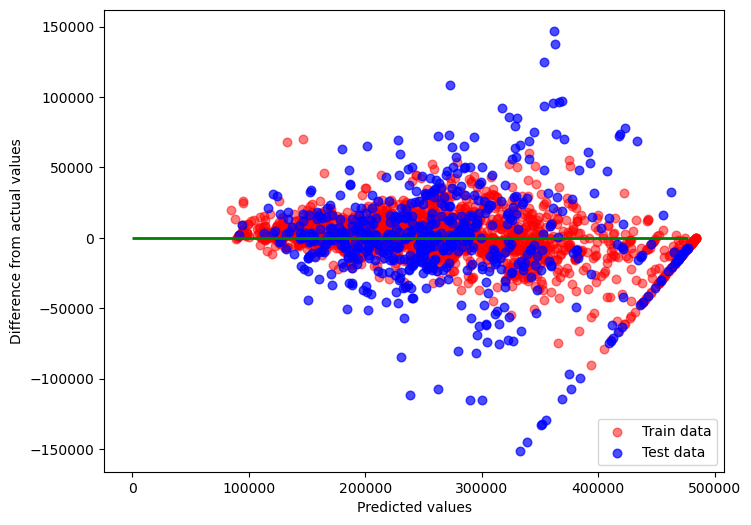

In [84]:
#Modelin performansının vizuallaşdırılması
train_pred = random_f_tuned.predict(X_train_scaled)
test_pred = random_f_tuned.predict(X_test_scaled)
max_prediction = max(act_pred['Predicted'])

plt.figure(figsize=(8,6))

plt.scatter(train_pred, train_pred - y_train,
          c = 'red', marker = 'o', s = 38, alpha = 0.5,
          label = 'Train data');
plt.scatter(test_pred, test_pred - y_test,
          c = 'blue', marker = 'o', s = 38, alpha = 0.7,
          label = 'Test data');
plt.xlabel('Predicted values')
plt.ylabel('Difference from actual values')
plt.legend(loc = 'lower right')
plt.hlines(y = 0, xmin = 0, xmax = max_prediction, lw = 2, color = 'green');


>Qeyd: Modeldə daha az korrelyasiyaya malik olan features-lər çıxarıla və ya outlier-lar əvəzetmə əvəzinə silinərək modelin performansı daha da artırıla bilər.